In [1]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
os.chdir('..')
import virl
from matplotlib import pyplot as plt

import pandas as pd
from IPython import display


def smooth_plot(all_rewards, smoothed_rewards,title): 
    plt.figure(2, figsize=(12, 6))
    plt.clf()
    plt.title(title)
    plt.xlabel("Epsiode") 
    plt.ylabel("Total Reward")
    plt.plot(all_rewards, '--', alpha=0.5) 
    plt.plot(smoothed_rewards) 
    plt.legend(["Rewards", "Rewards (Smoothed)"]) 

In [2]:
class Tabular_Policy_Agent:
        
    def __init__(self,env):
        
        #Hyper parameters
        self.policy_table = {}
        
        self.num_of_actions = env.action_space.n
        self.env = env
        
        self.episodes = 500
        self.print_out_every_x_episodes = int(self.episodes/50)
        self.times_exploited = 0
        
        
         # hyper parameters for discretising state data
        self.highest = 600000000
        self.lowest = 0
        self.number_bins = 20
        
        # hyper parameters for epsilon explore
        self.initial_epsilon = 1 # initial
        self.decrease_factor = (1/self.episodes)/1.25 # epsilon
        print("Decrease Factor: " + str(self.decrease_factor))
        
    def continous_to_discrete(self,continous_state):
        bins = np.linspace(self.lowest,self.highest,num=self.number_bins)
        discrete = np.digitize(continous_state,bins)
        return tuple(discrete)
    
    def train(self):
        states,all_rewards, all_total_rewards = self.run_all_episodes("Training")
        return states,all_rewards, all_total_rewards

    
    def evaluate(self,episodes=100):
        self.episodes = episodes
        self.epsilon = -1000
        states,all_rewards, all_total_rewards = self.run_all_episodes("Evaluation")
        return states,all_rewards, all_total_rewards
    
    
    def run_all_episodes(self,title):
        all_rewards = []
        epislon = self.initial_epsilon # at the start only explore
        all_total_rewards = []
        
        
        for episode in range(1, self.episodes + 1):
            states,rewards = self.run_episode(epislon)
            total_reward = np.sum(rewards)

#             if episode % self.print_out_every_x_episodes == 0:
#                 print("Episode number: " + str(episode) + ". Total reward in episode: " + str(total_reward) + ". Episode executed with epsilon = " + str(epislon))
#                 print("Average total reward in last " + str(self.print_out_every_x_episodes) + " episodes: " + str(np.mean(all_rewards[-self.print_out_every_x_episodes:])))
#                 print("Times exploited the last episode " + str(self.times_exploited))
#                 print("-----")
            self.times_exploited = 0
            all_total_rewards.append(total_reward)
            all_rewards.append(rewards)
            epislon -= self.decrease_factor #hyperparameter
            
        window_size = int(self.episodes/10)
        smoothed_rewards = pd.Series(all_total_rewards).rolling(window_size, min_periods=window_size).mean() 
        this_smoothed_reward = smoothed_rewards.values[-1]
        smooth_plot(all_total_rewards, smoothed_rewards,title)
        
        return states,all_rewards, all_total_rewards
    
    def run_episode(self,epislon):
        rewards = []
        states = []
        actions = []
        done = False
        
        state = self.env.reset()
        states.append(state)
      
        while not done:
            random_number = np.random.random()
            if random_number < epislon:
                #explore
                action = np.random.choice(self.num_of_actions)
                
            else:
                #exploit
                action = self.get_action(state)
                self.times_exploited += 1
              
            new_state, reward, done, i = self.env.step(action=action)
     
            states.append(new_state)
            actions.append(action)    
            rewards.append(reward)
            
            #update policy function
            self.update(new_state,action,reward)
        
            
            state = new_state
        return states,rewards
        
    def update(self,state,action,reward):
        #update the policy table
        state = self.continous_to_discrete(state)
        previous_action,current_best_reward =  self.policy_table.get(state,(-1,-100))
        if reward > current_best_reward:
            self.policy_table[state] = (action,reward)
                                                     
        
    def get_action(self,state):
        #tabular get best action from the policy
        state = self.continous_to_discrete(state)
        action,best_reward = self.policy_table[state]
        return action
    
    def get_action_text(self):
        return action_text
    
    def get_env(self):
        return env
    
    def get_chart_title(self):
        return "Action = " + action_text

In [ ]:
from Tabular_Policy_Agent import Tabular_Policy_Agent

In [7]:
from plot_helper import plot

Problem id: 0

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 1

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 2

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 3

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 4

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 5

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 6

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 7

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 8

Decrease Factor: 0.0016
Train
Evaluate
Problem id: 9

Decrease Factor: 0.0016
Train
Evaluate


C:\Users\chozo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


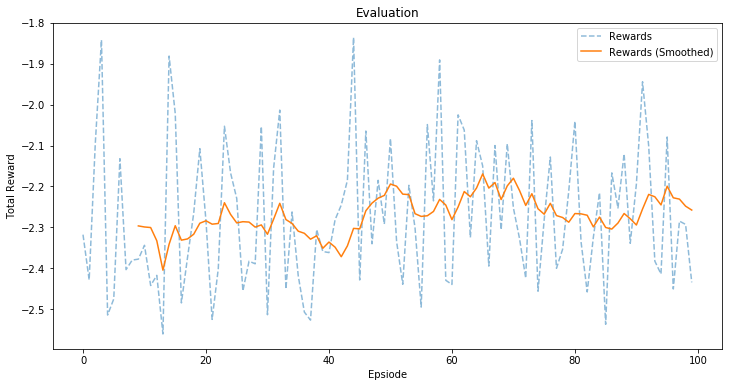

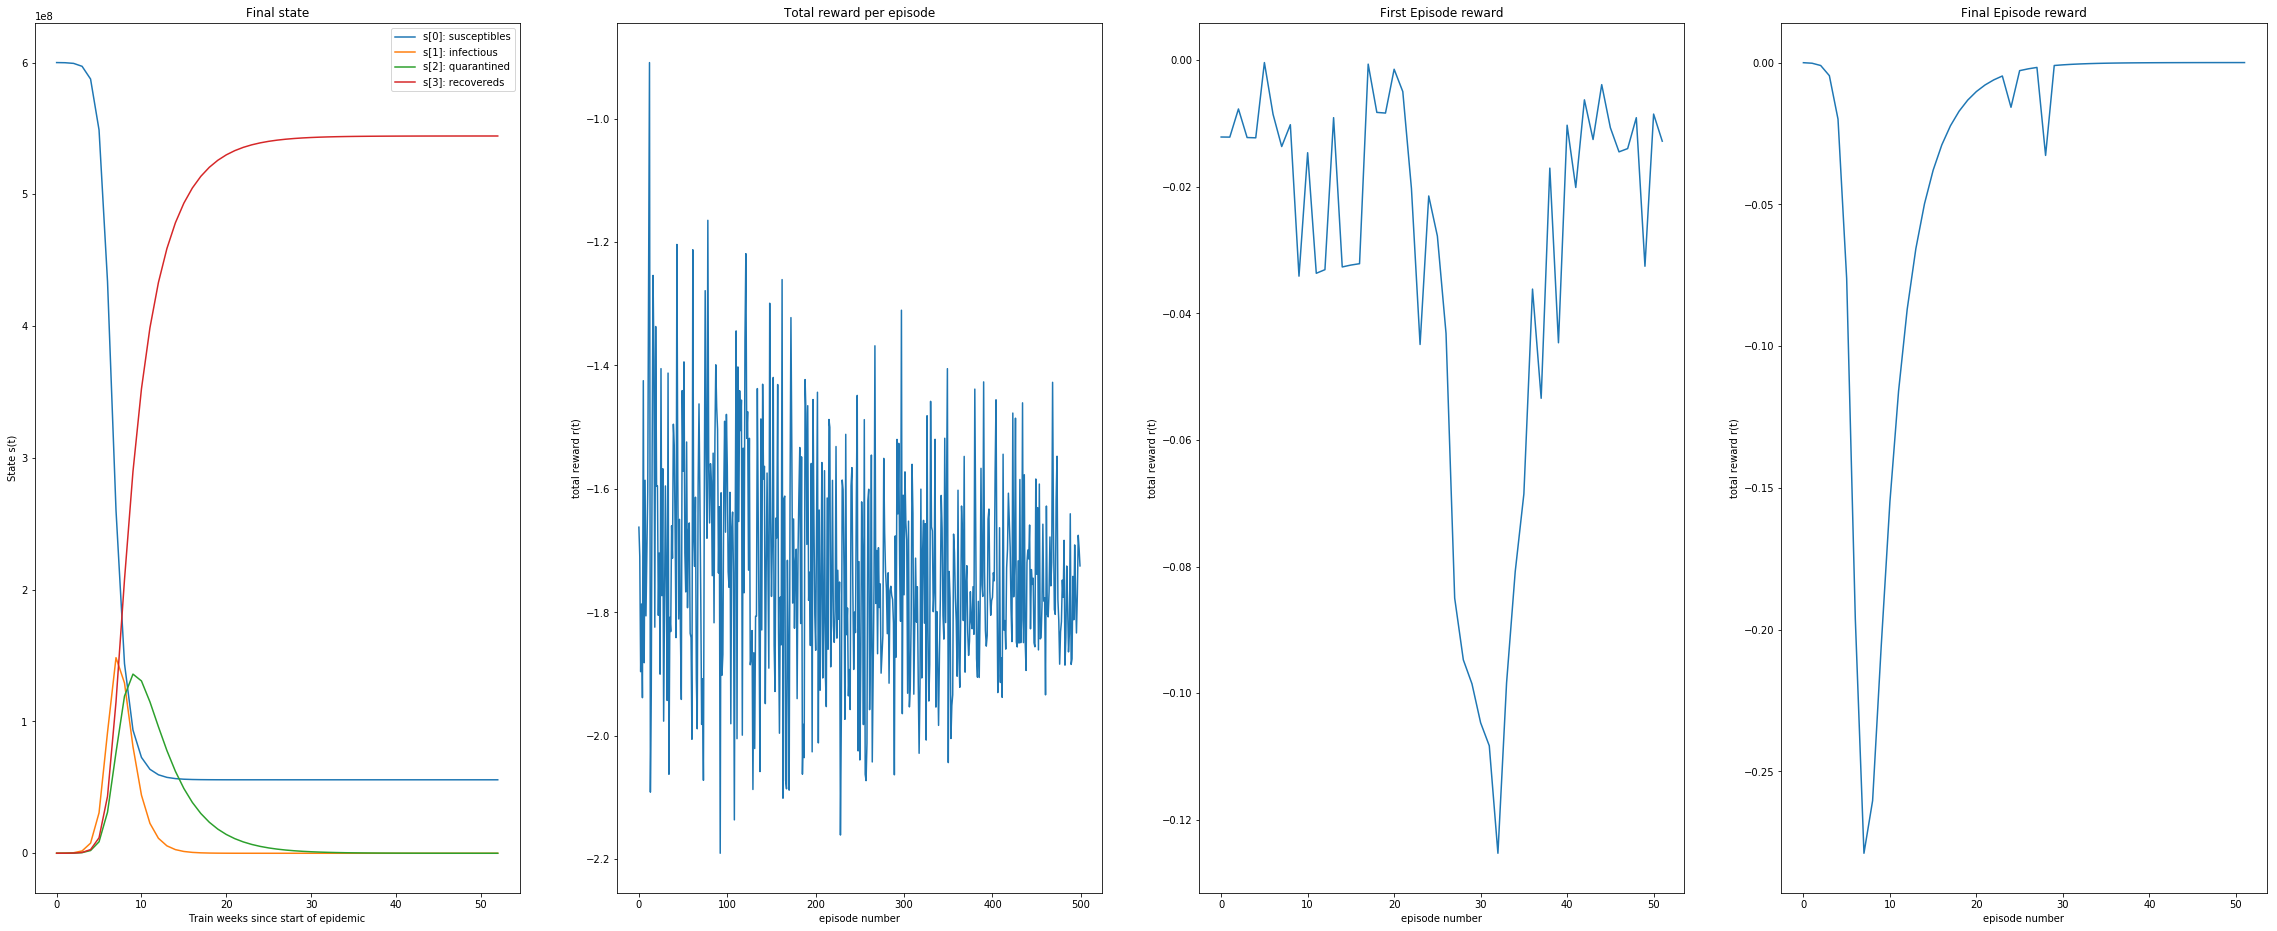

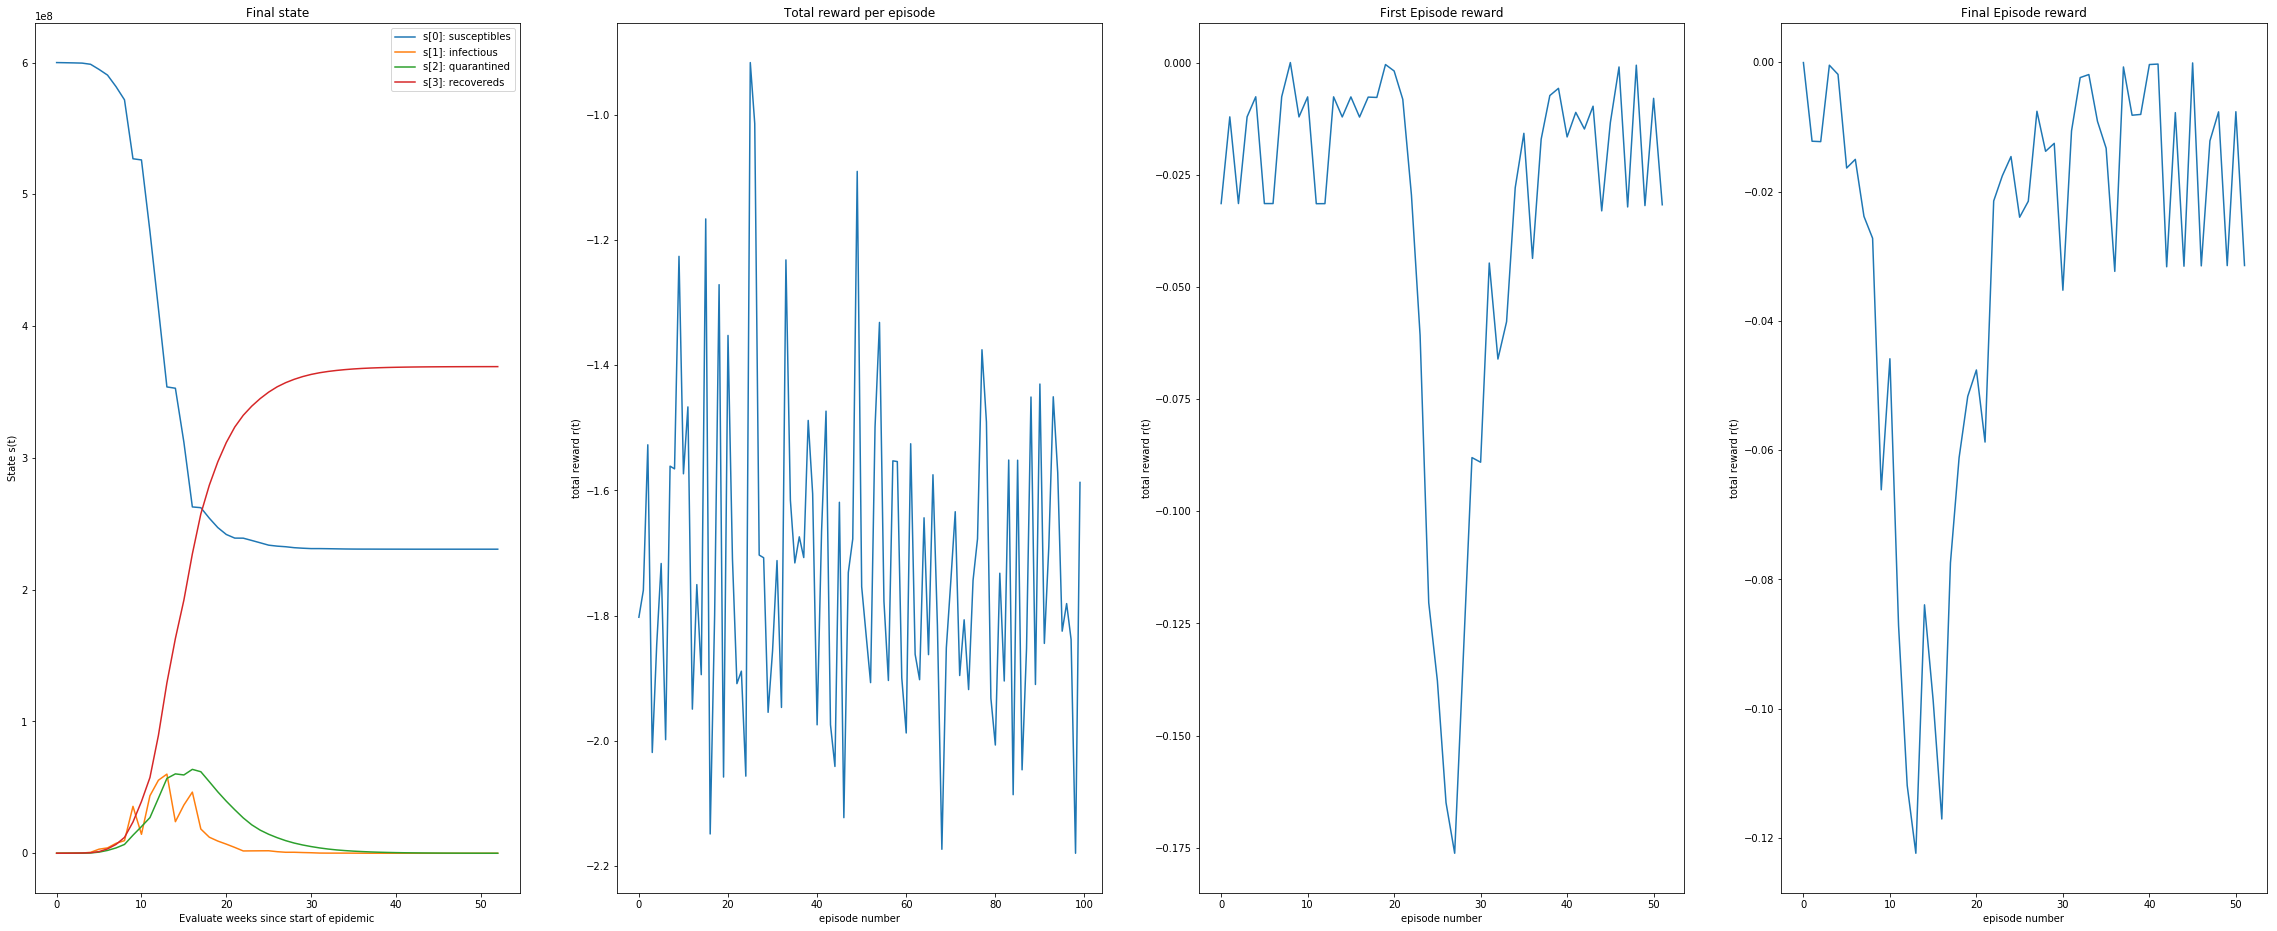

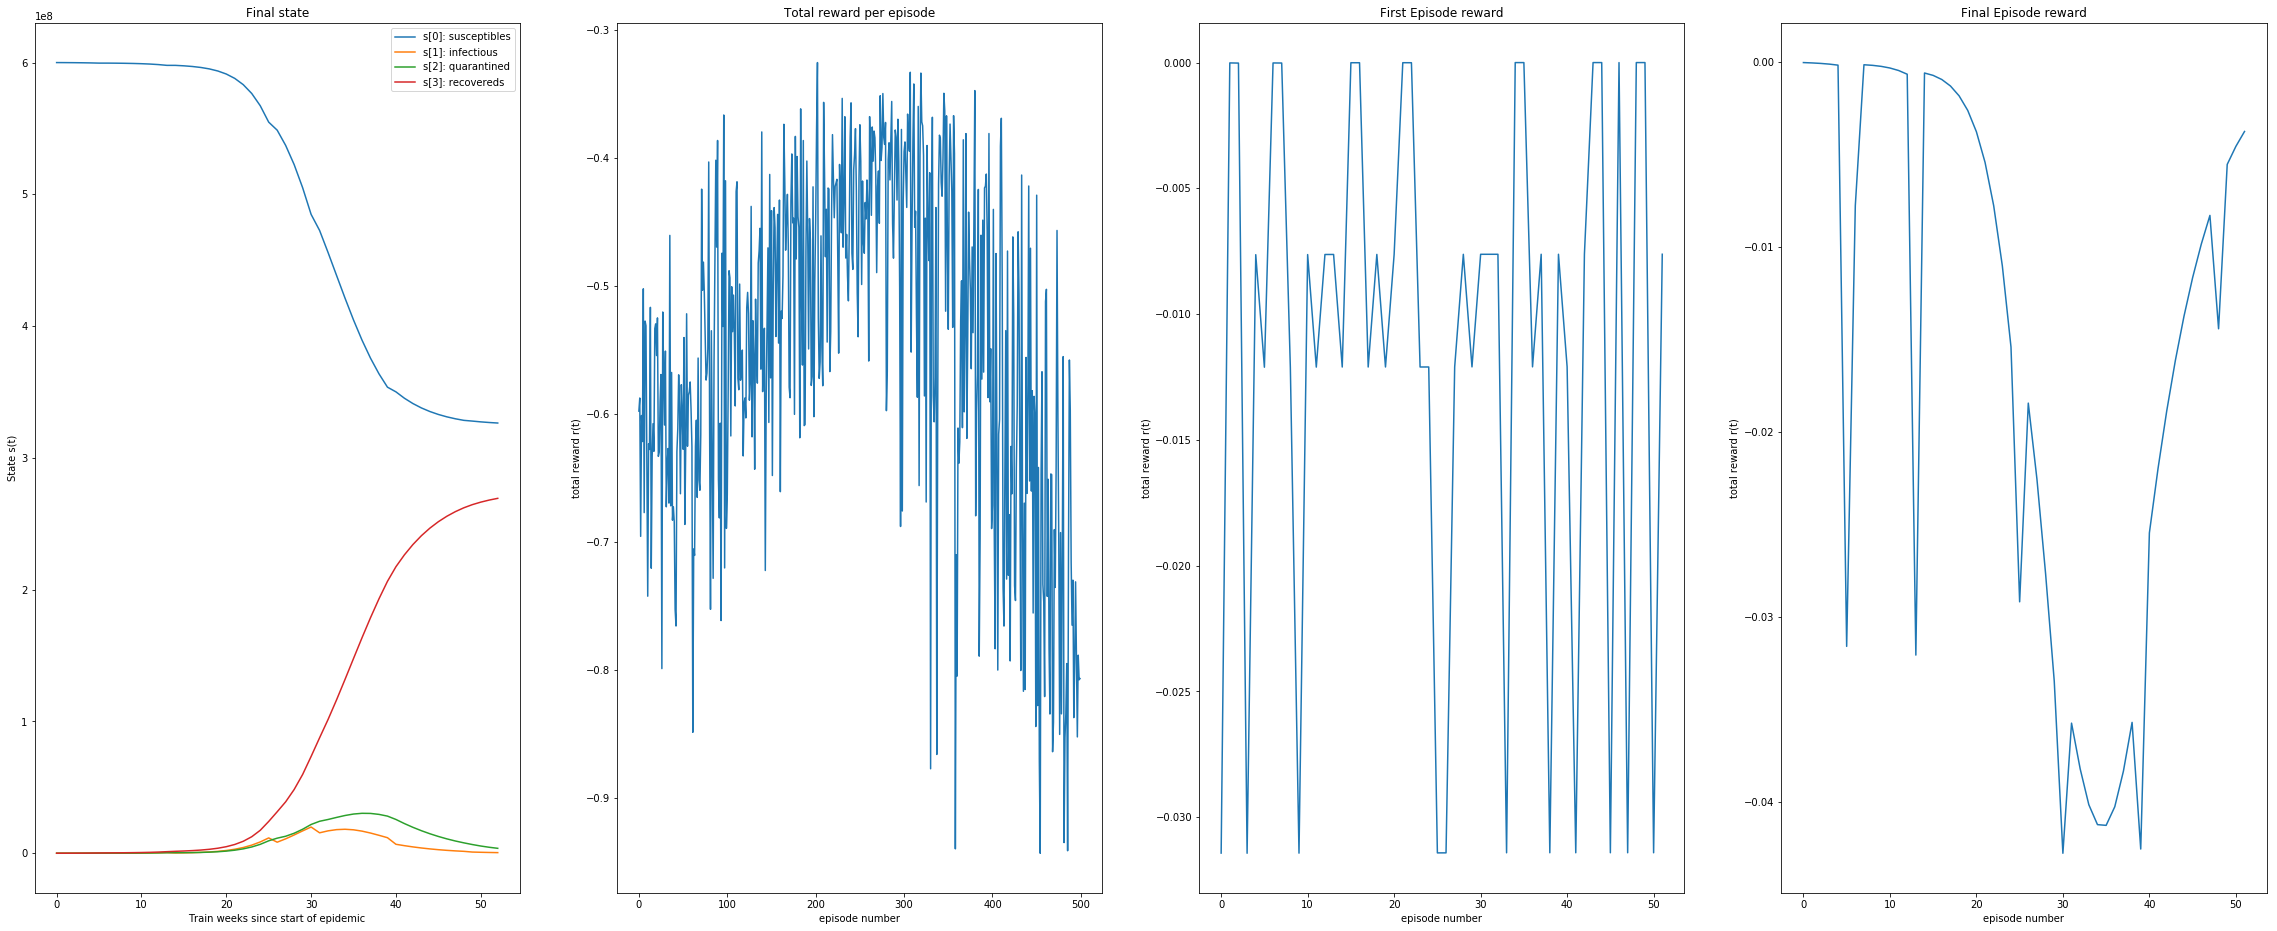

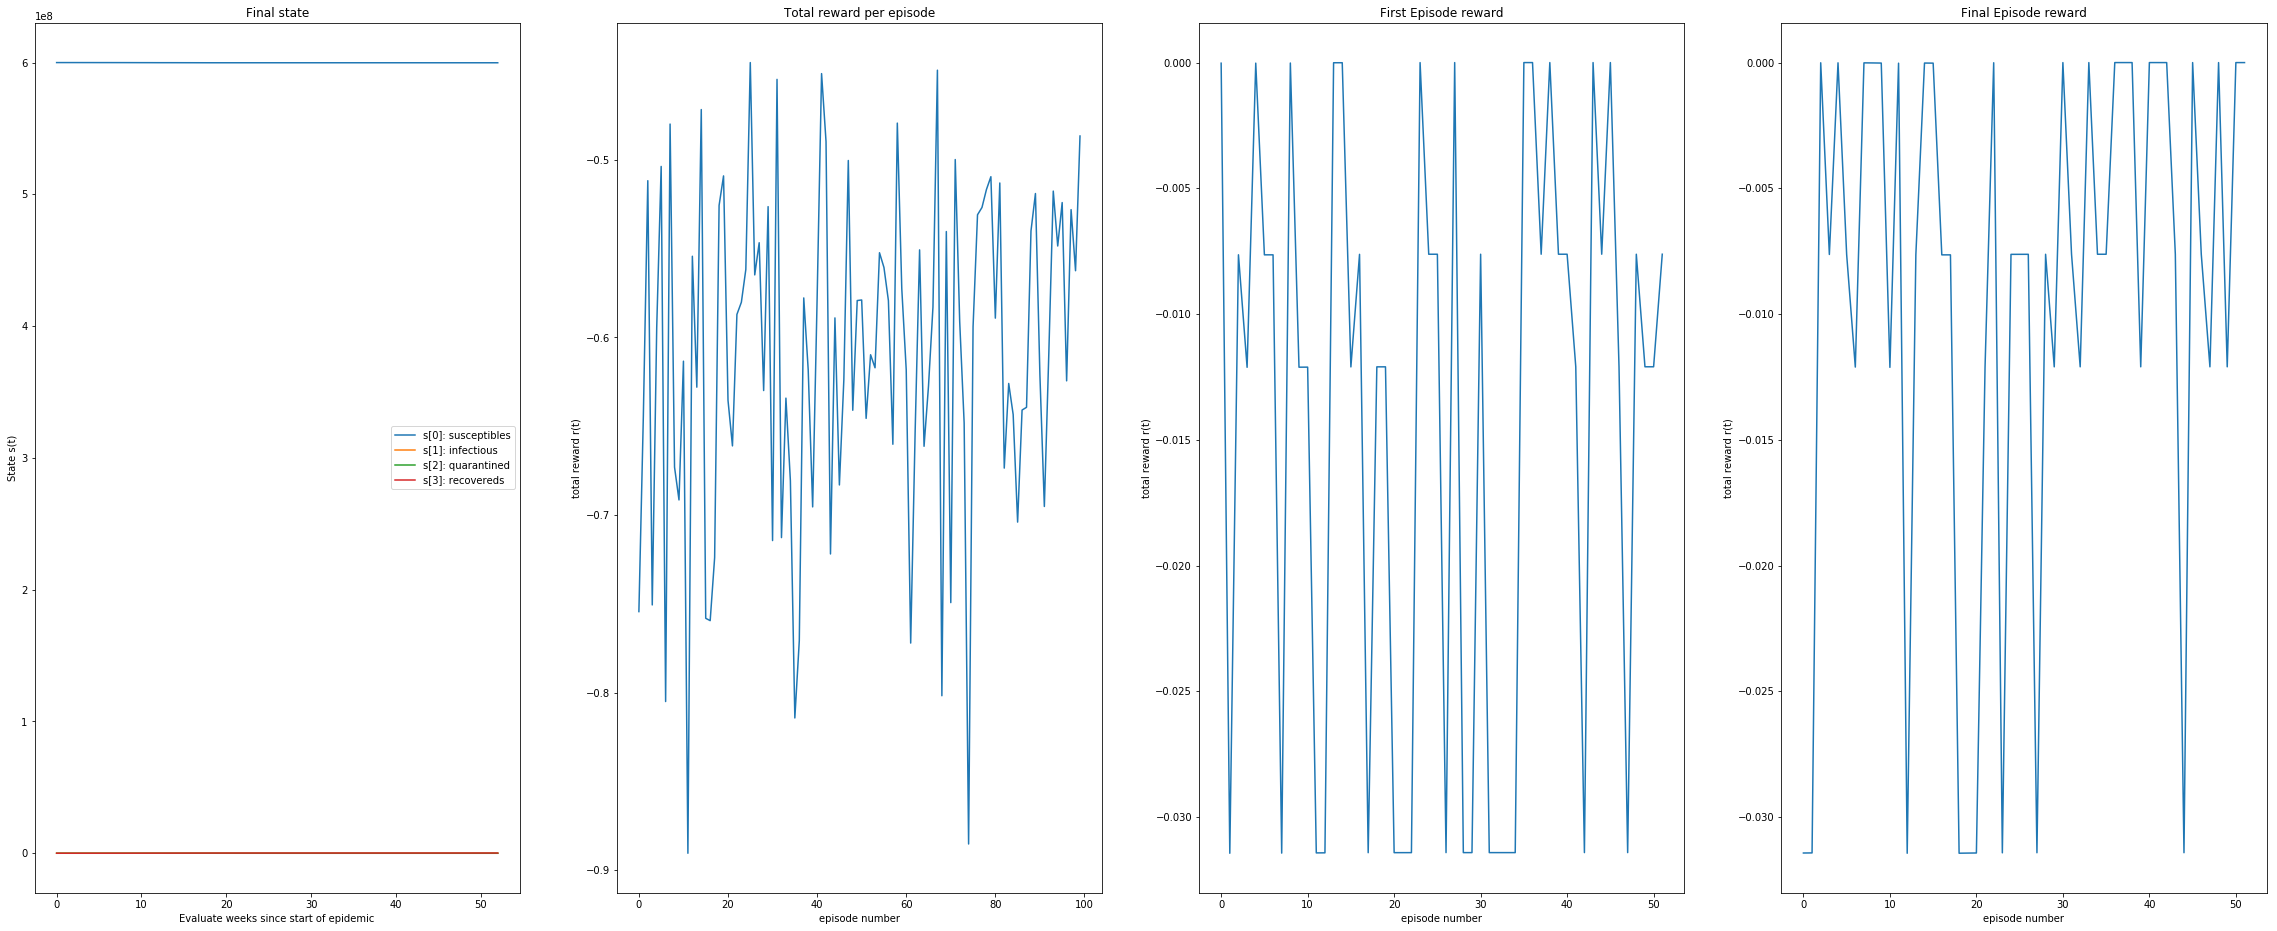

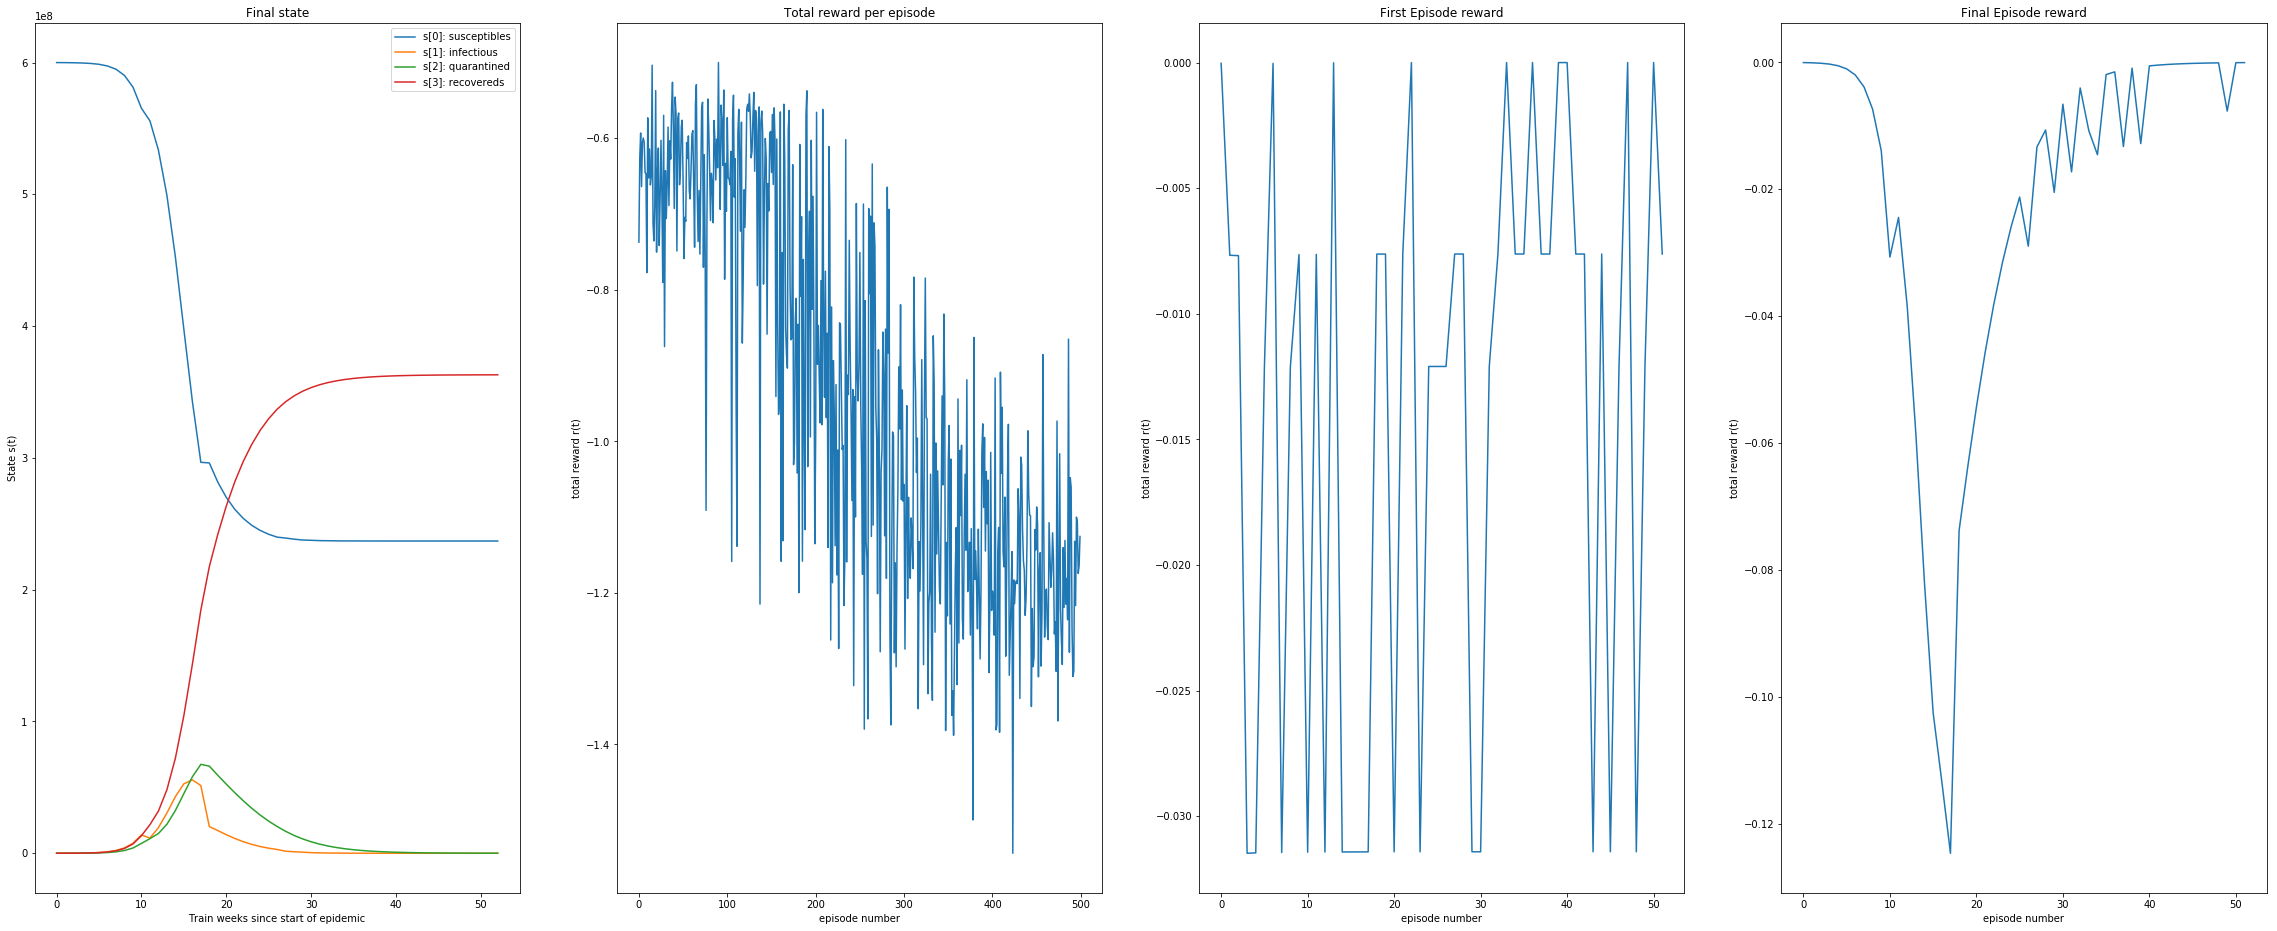

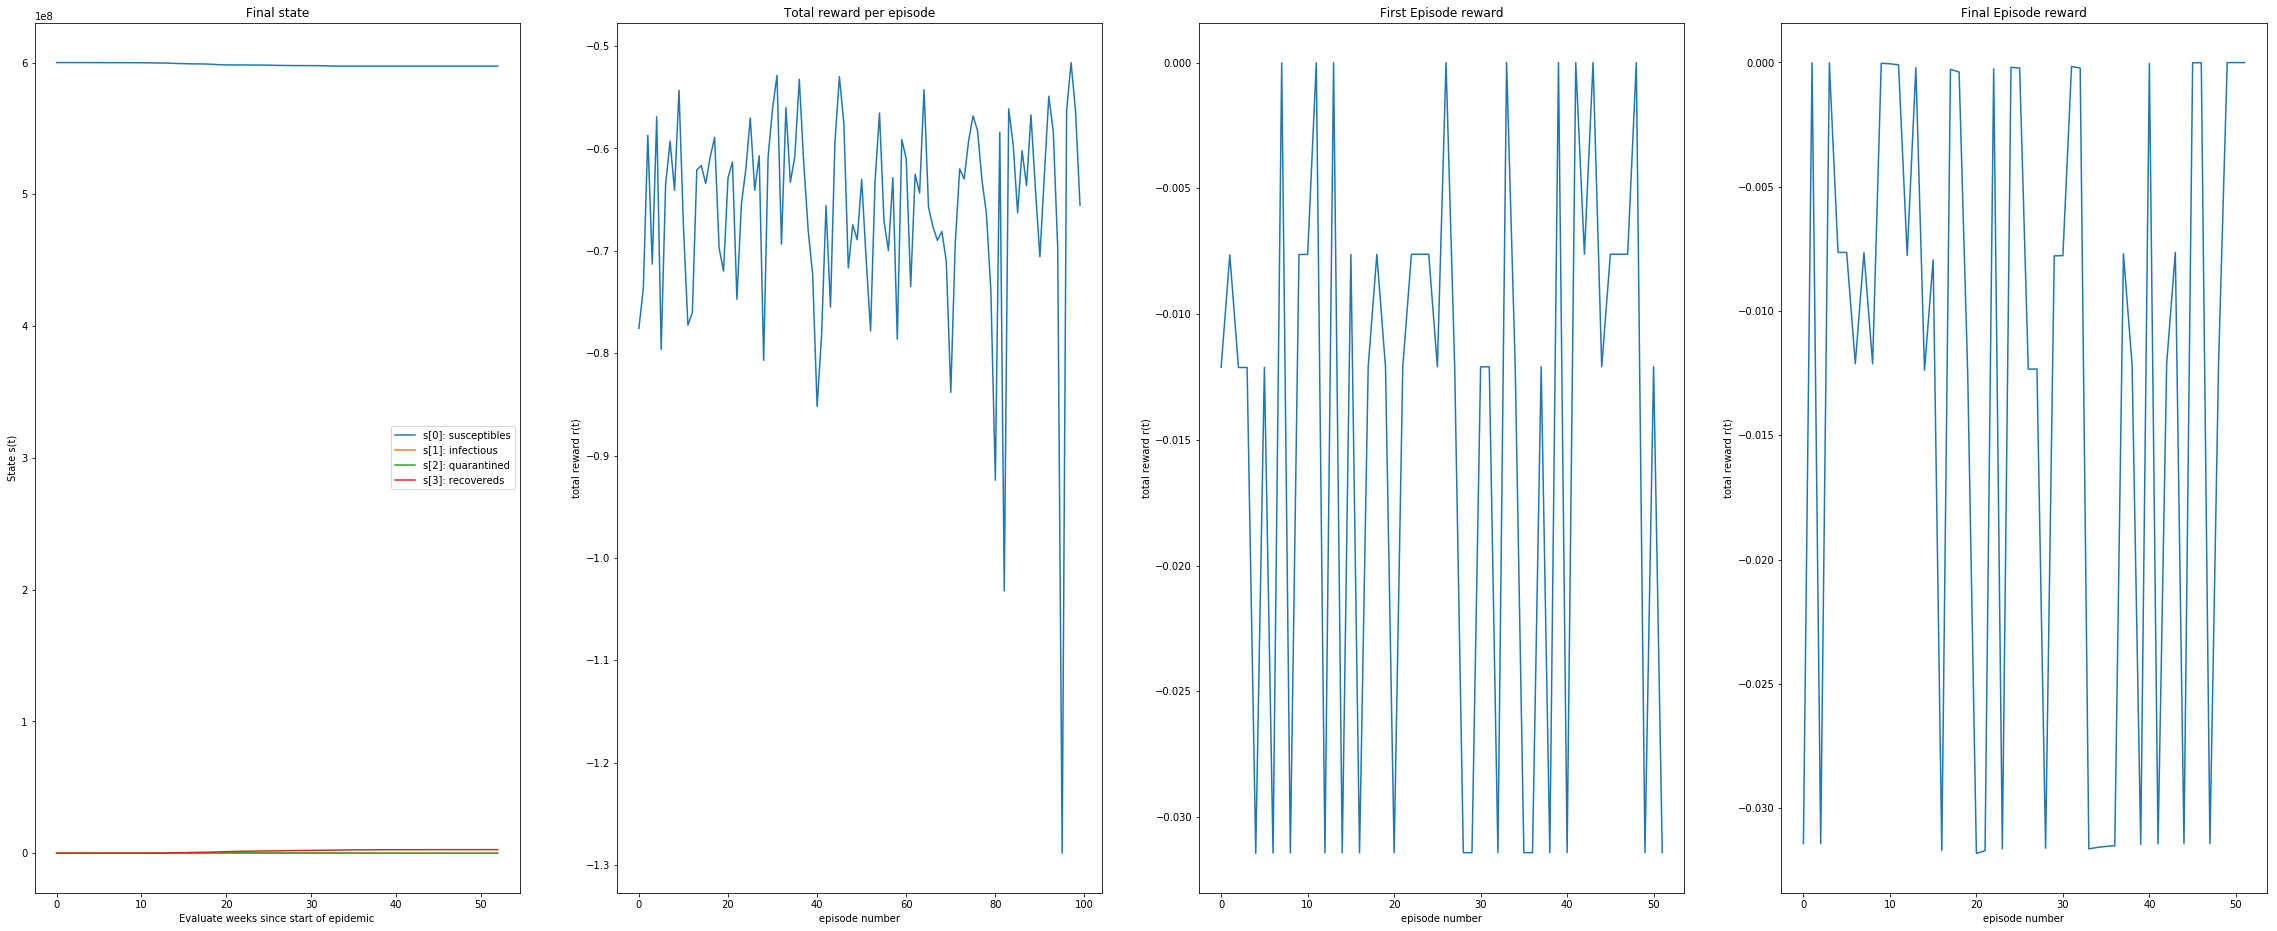

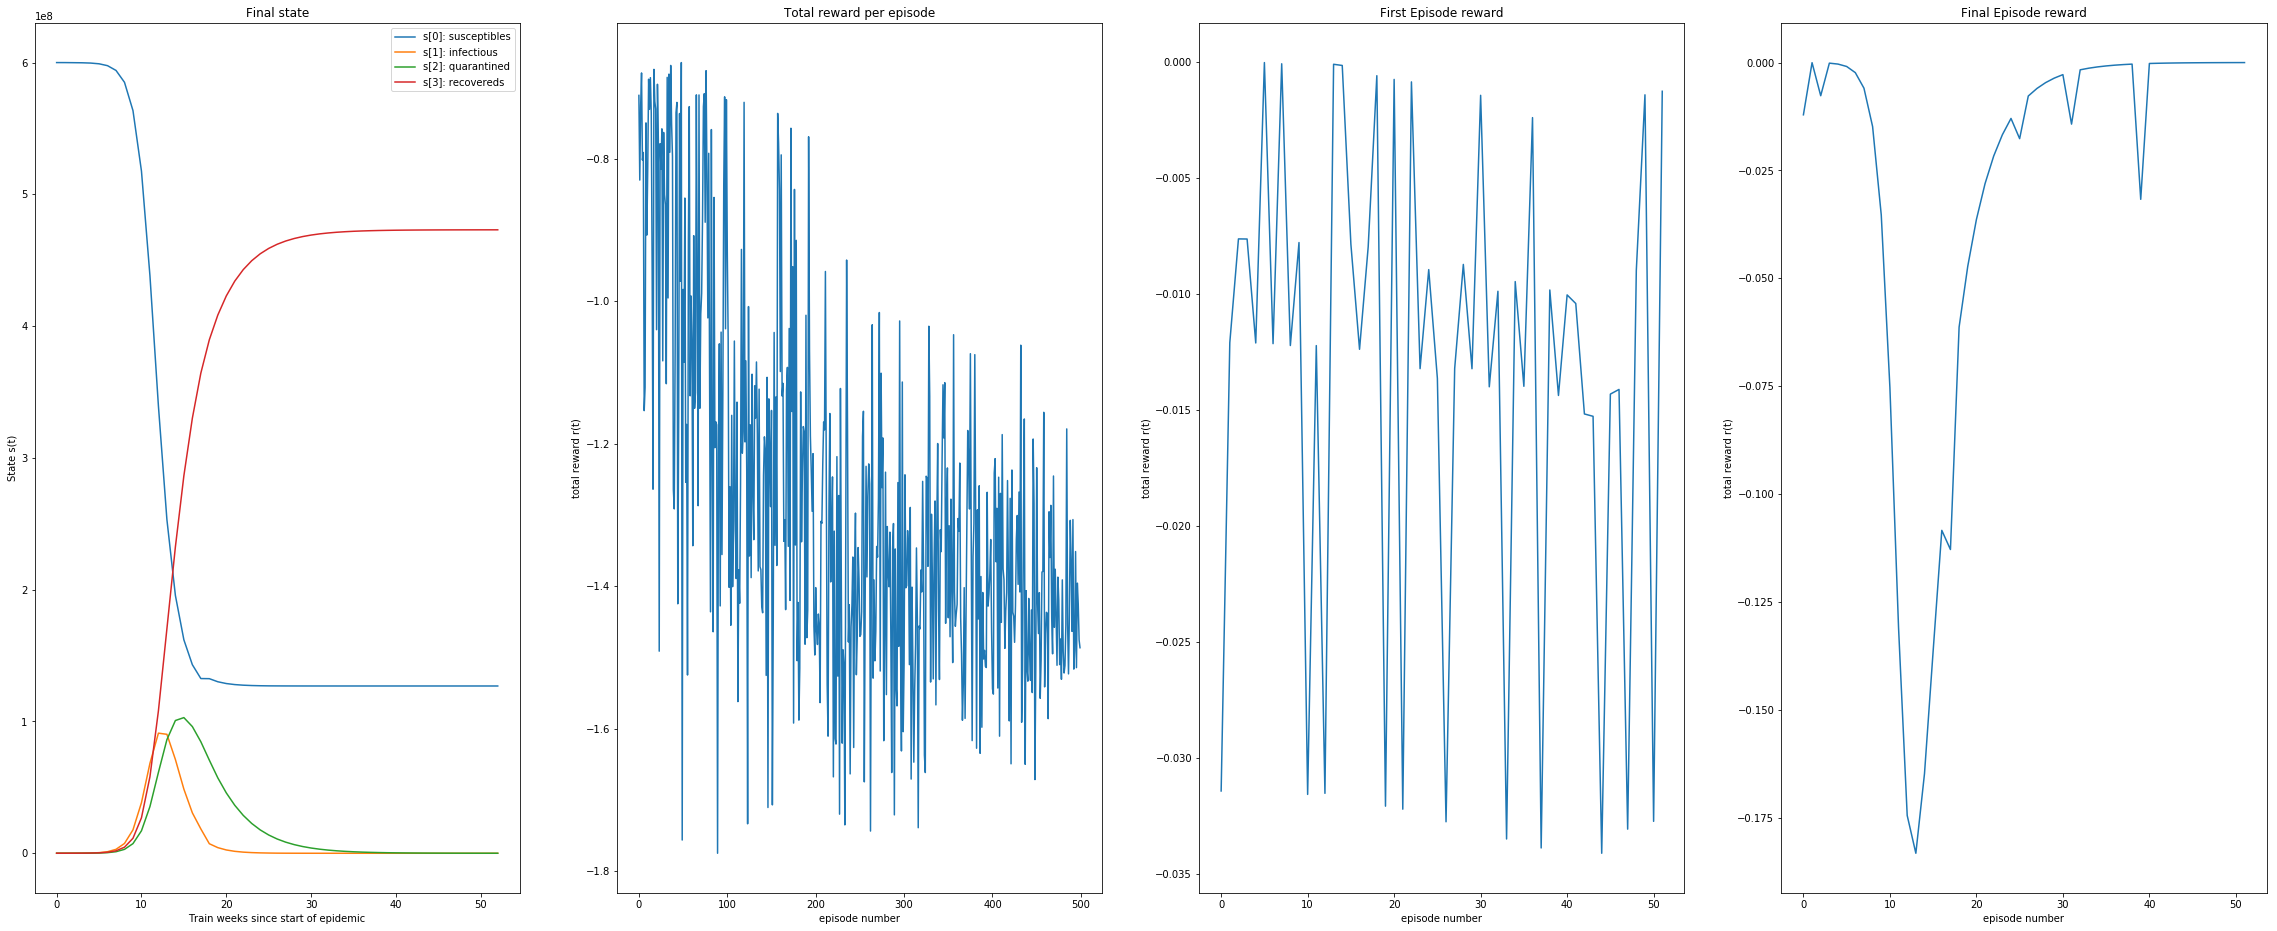

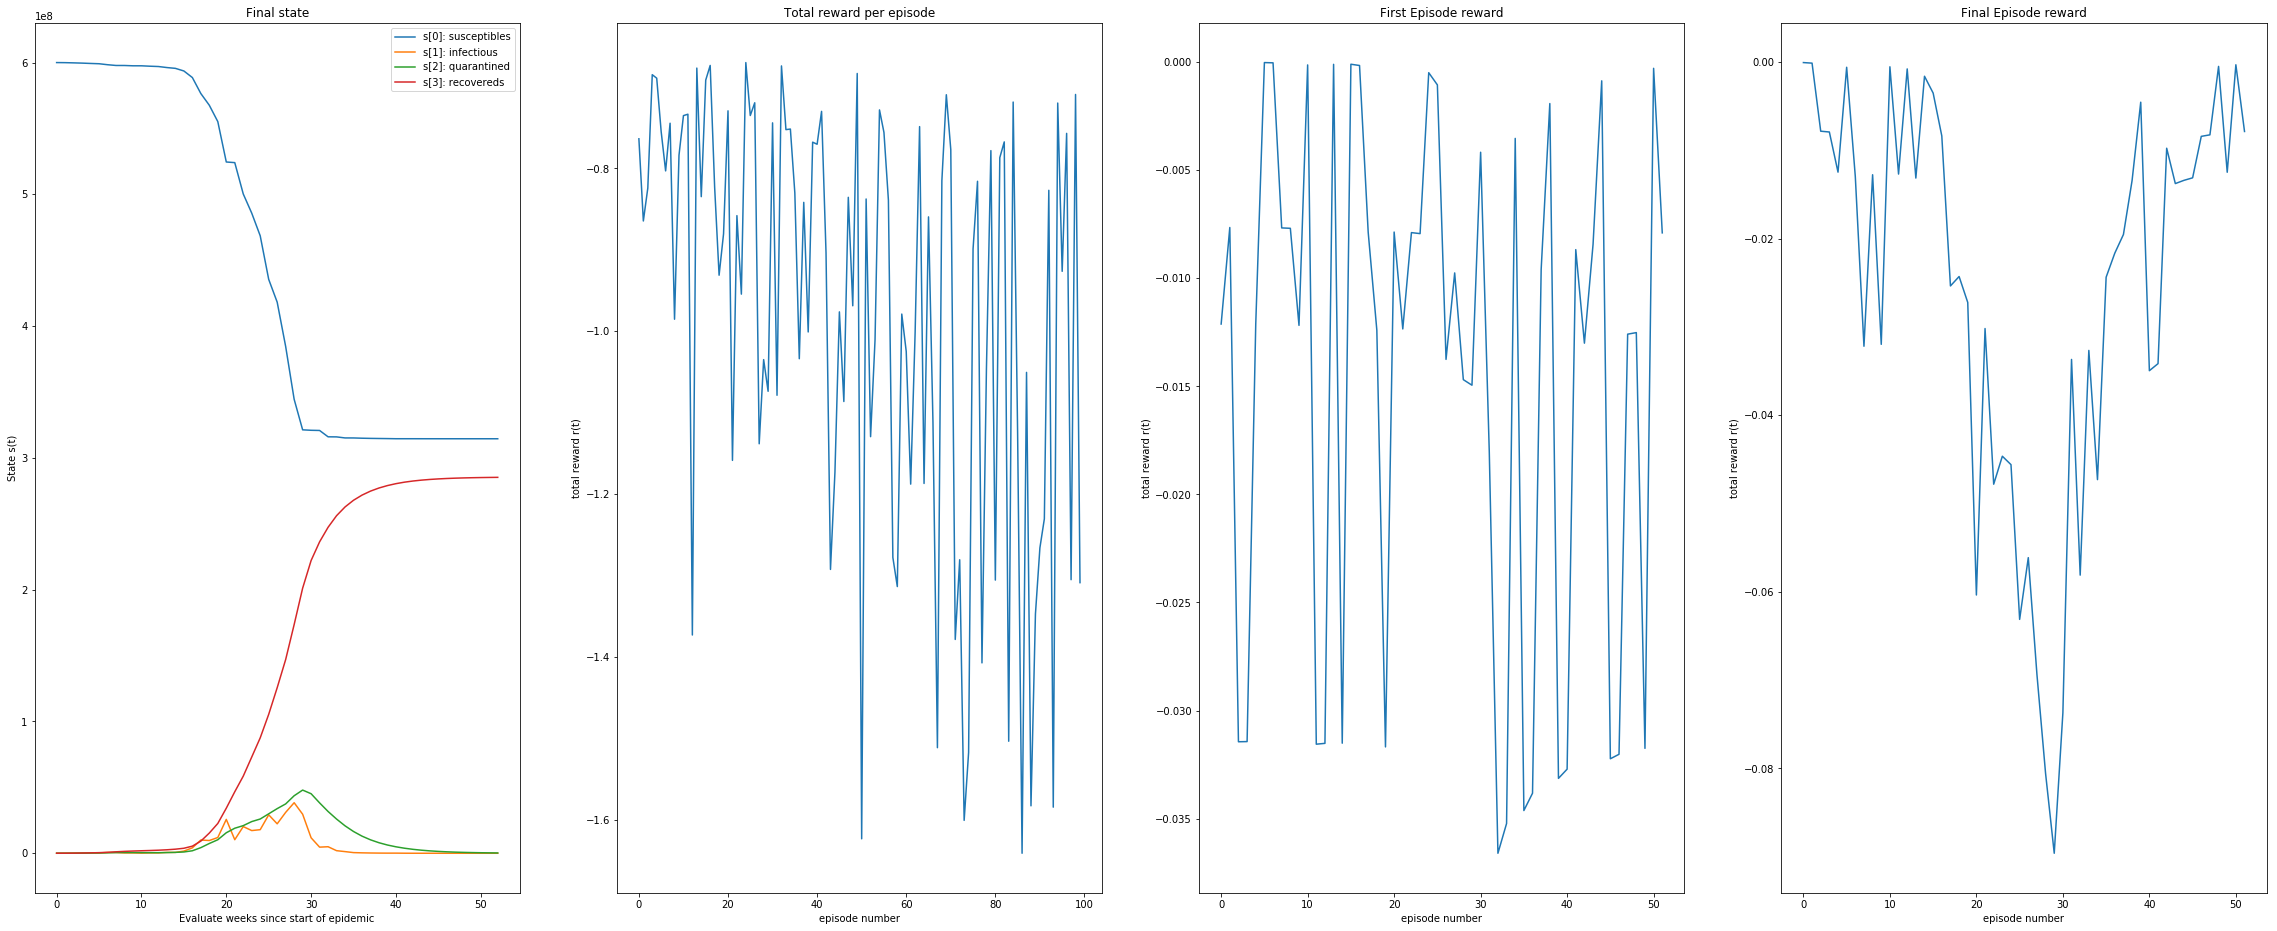

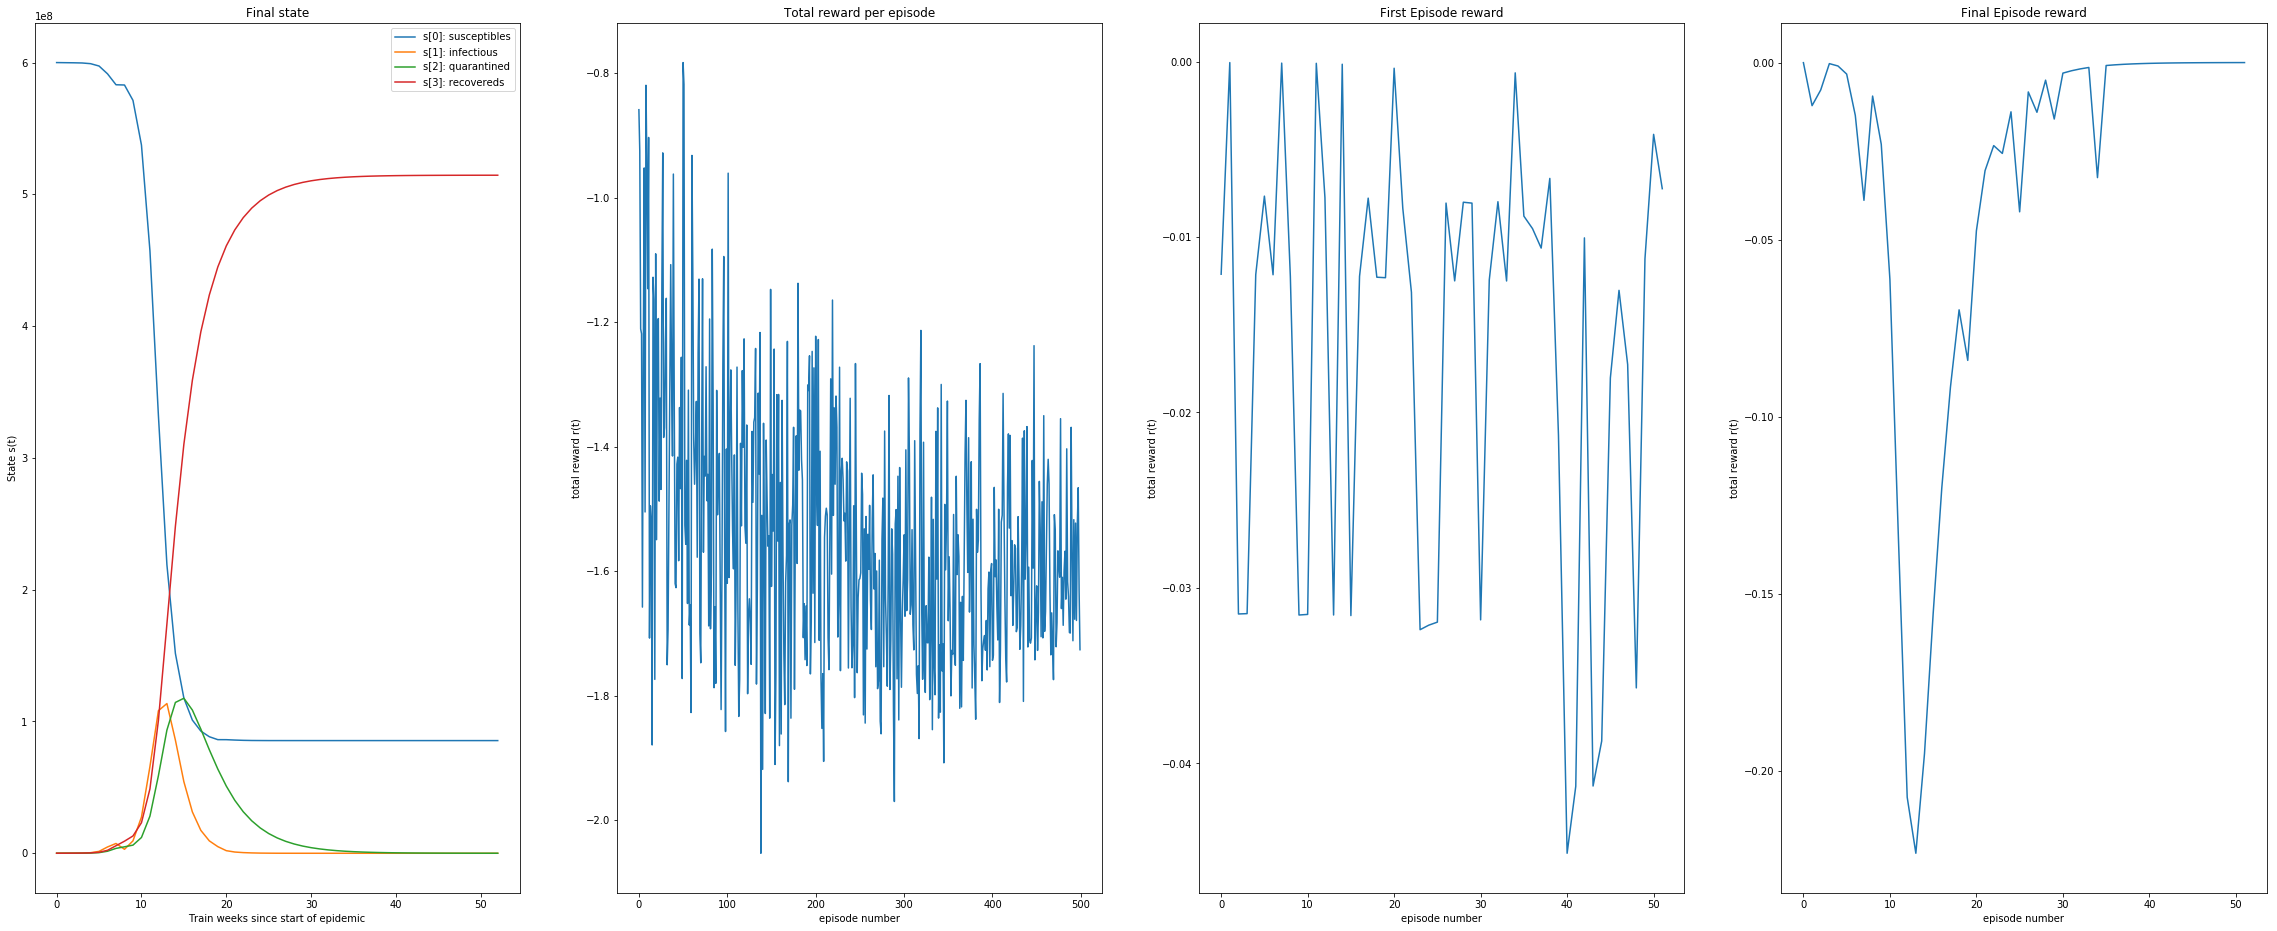

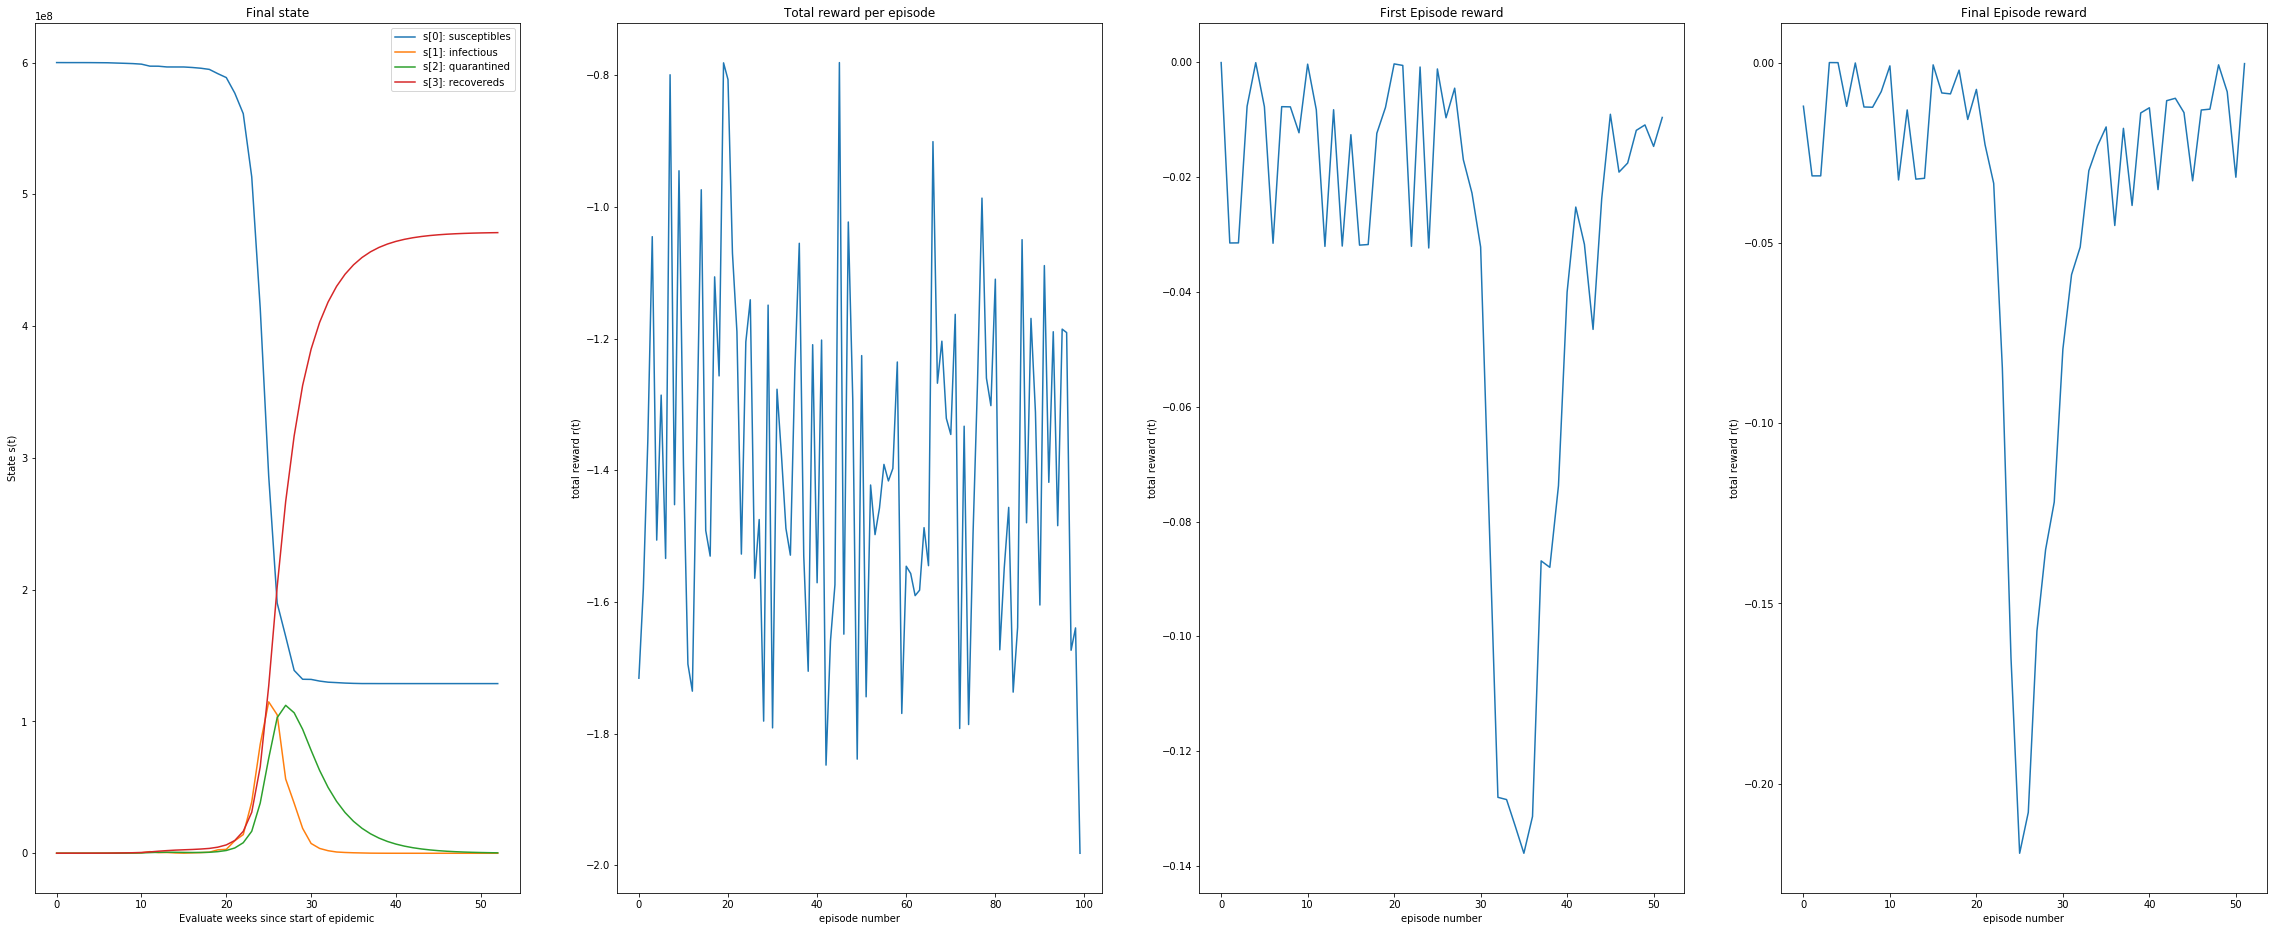

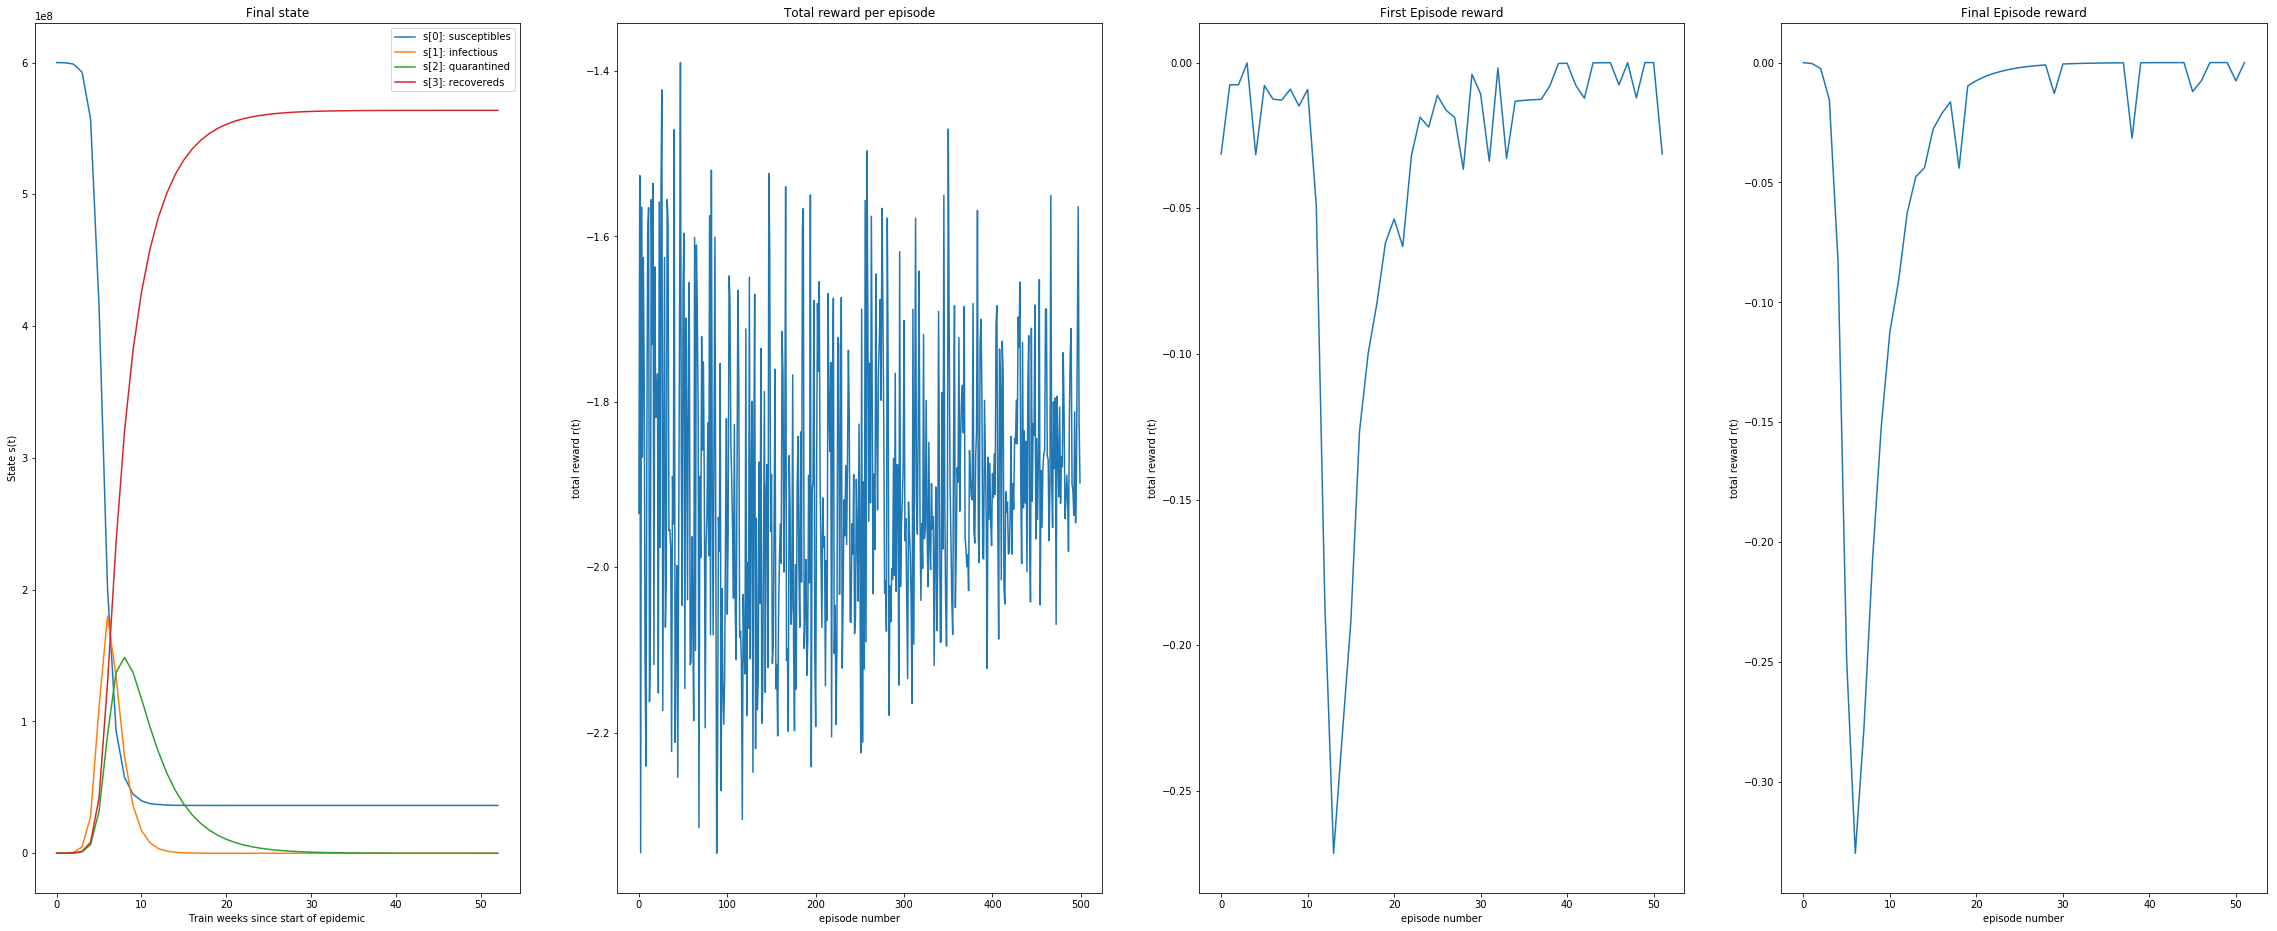

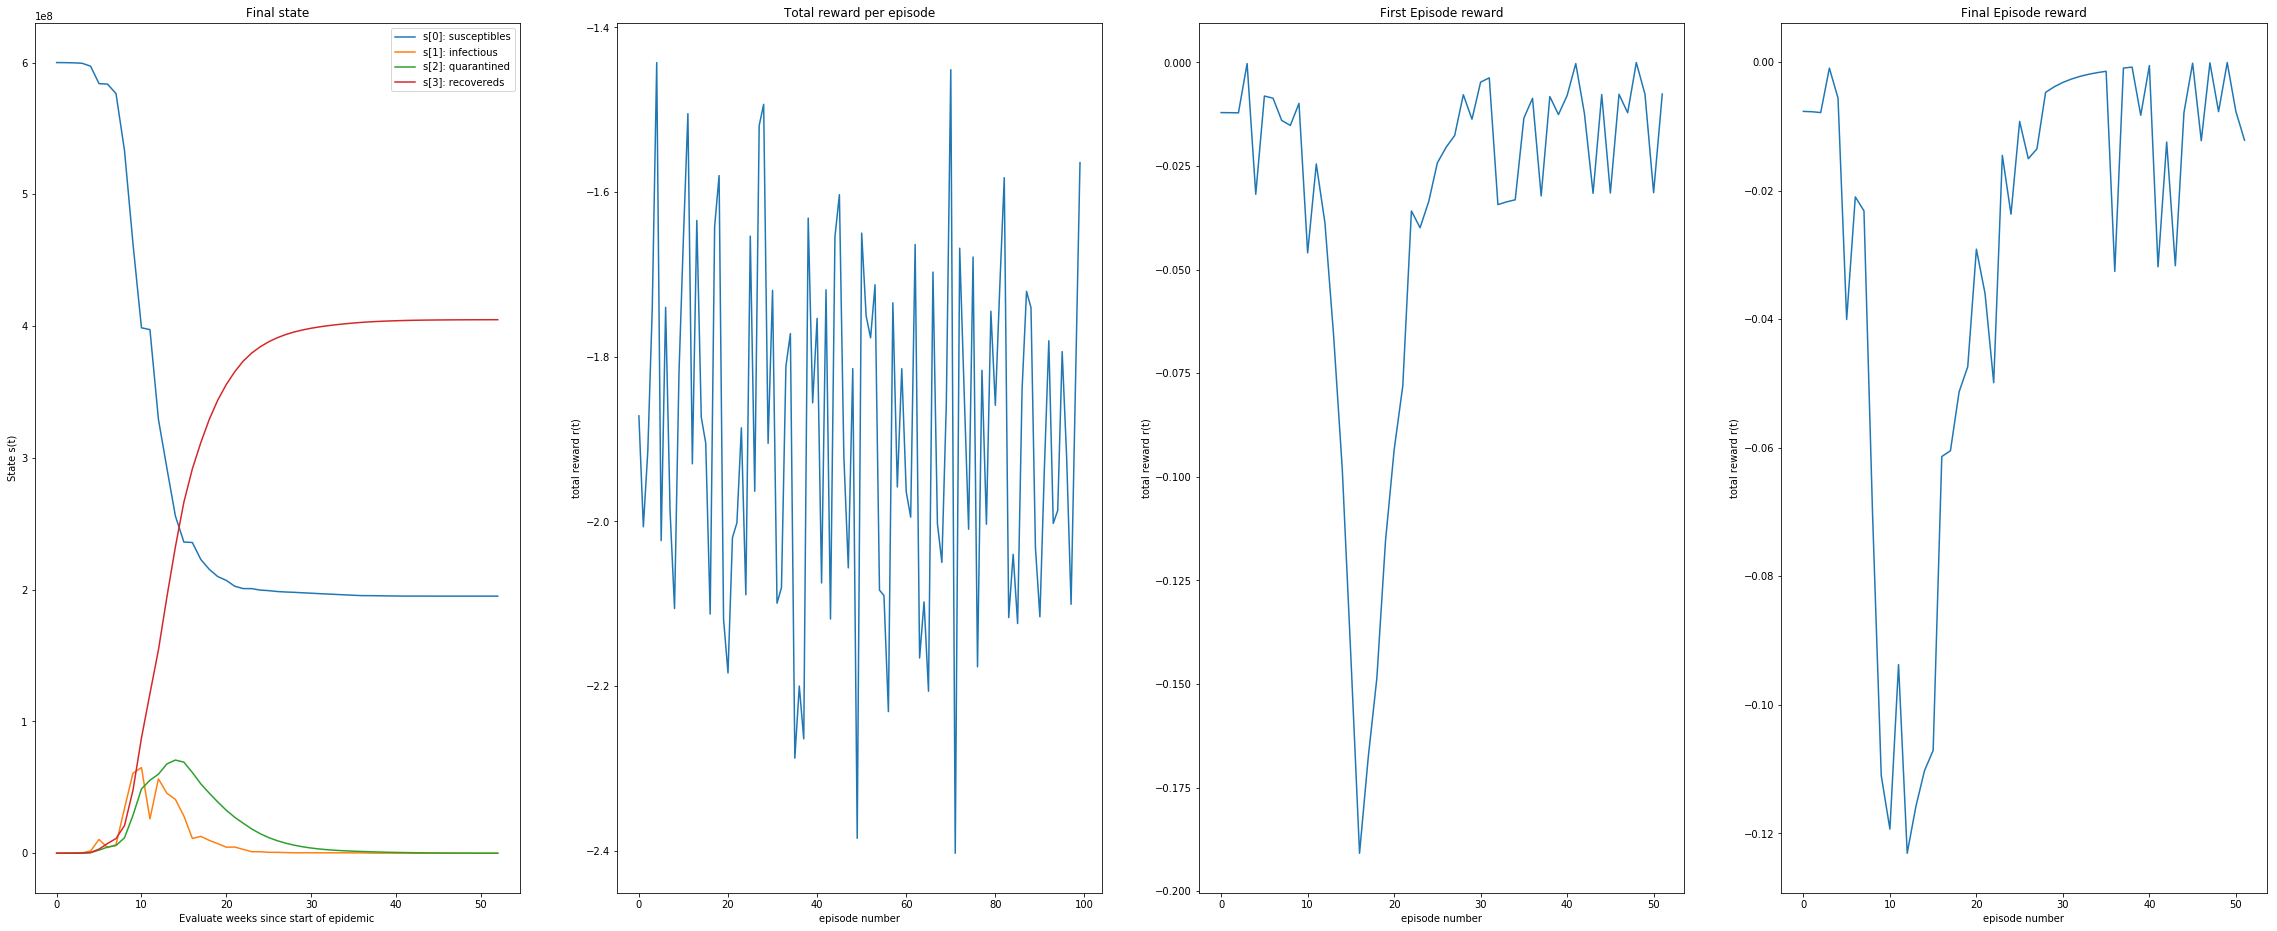

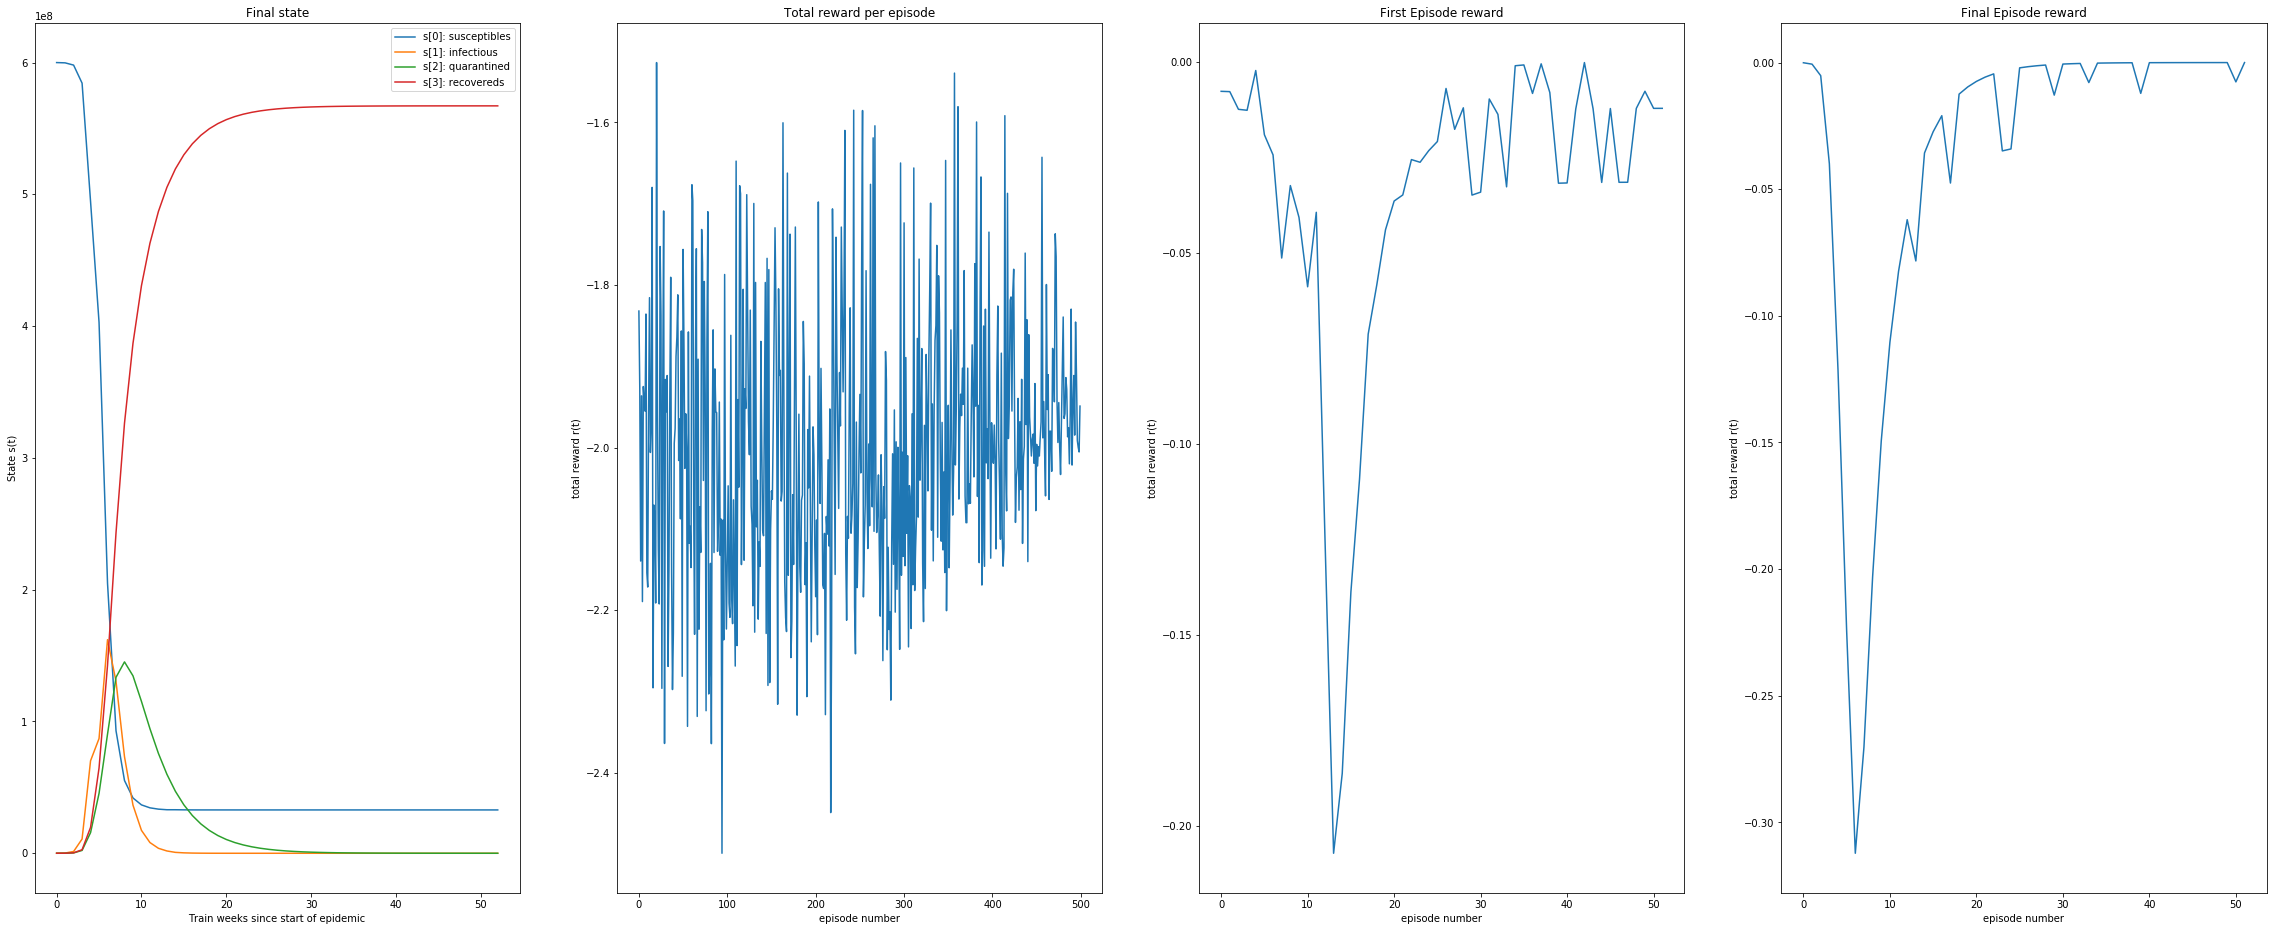

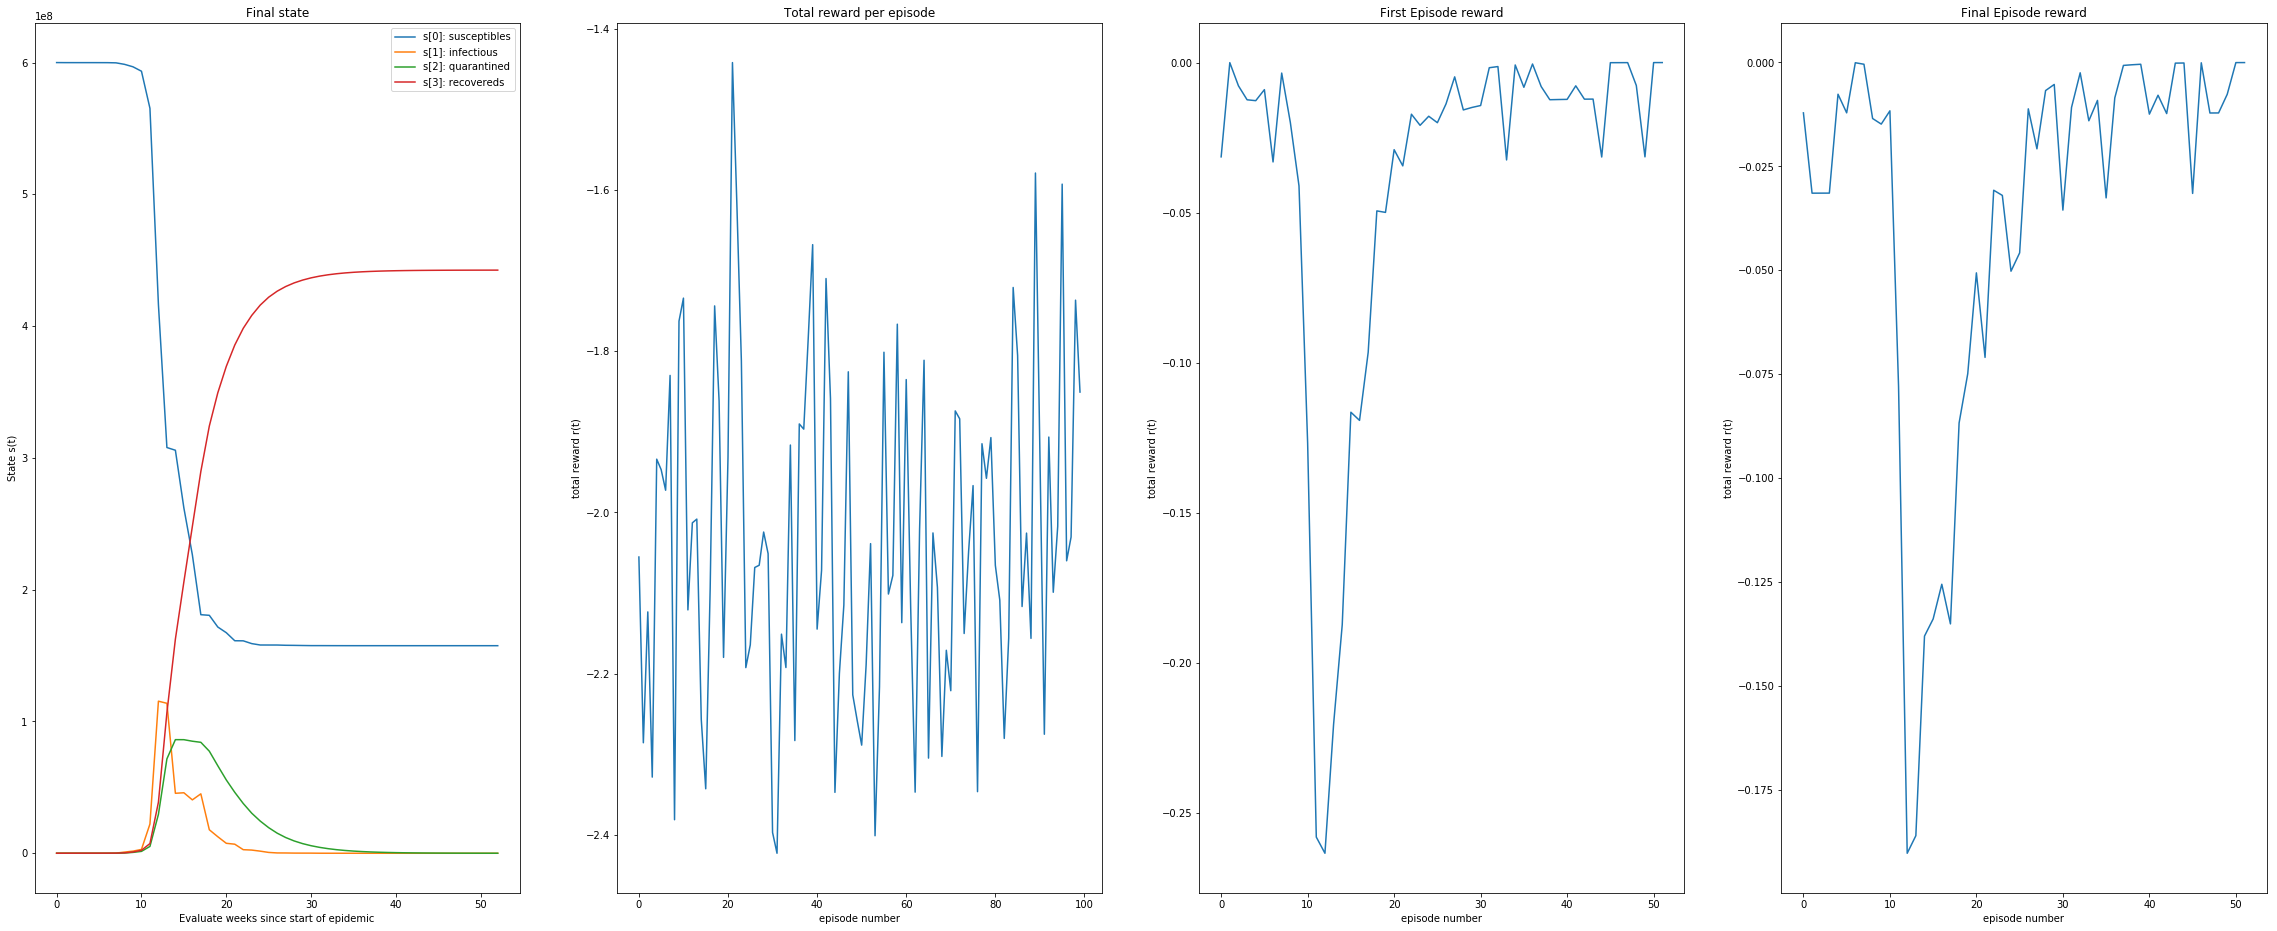

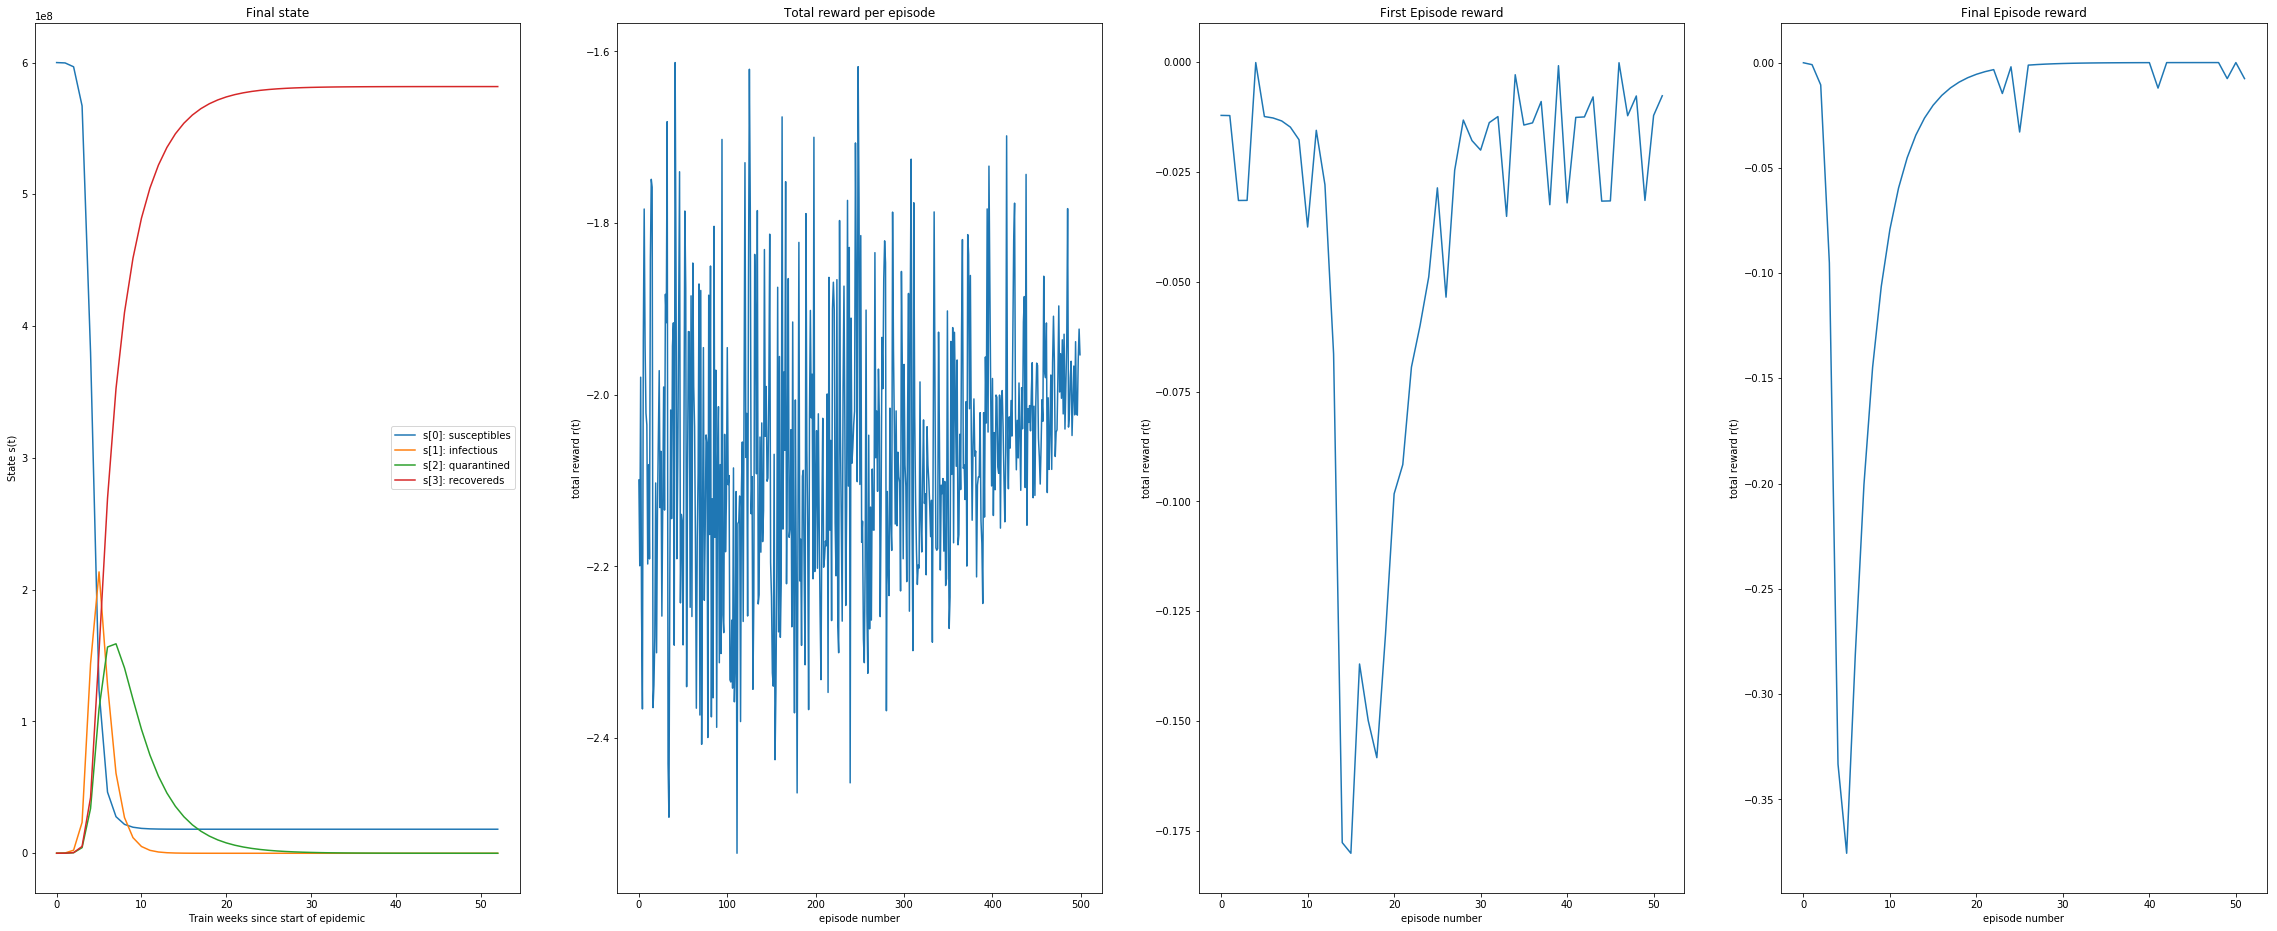

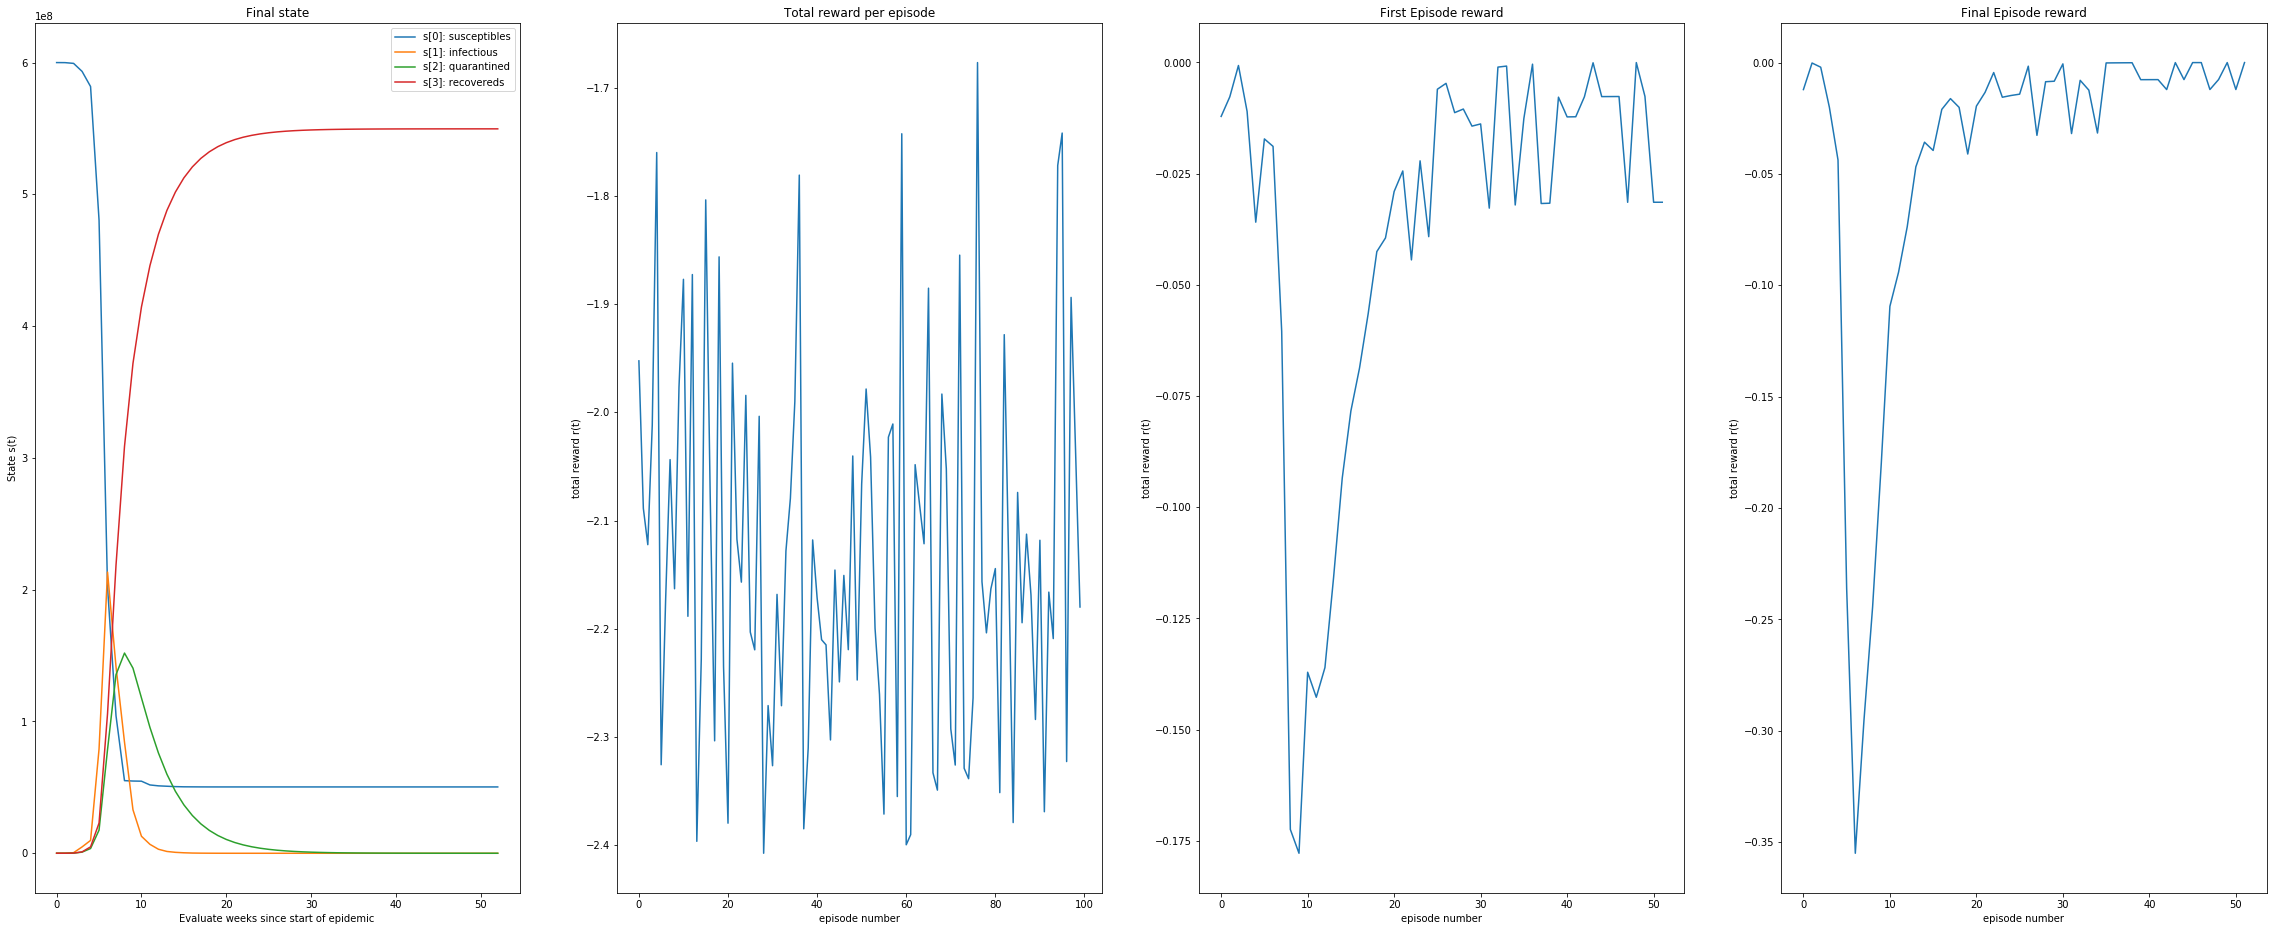

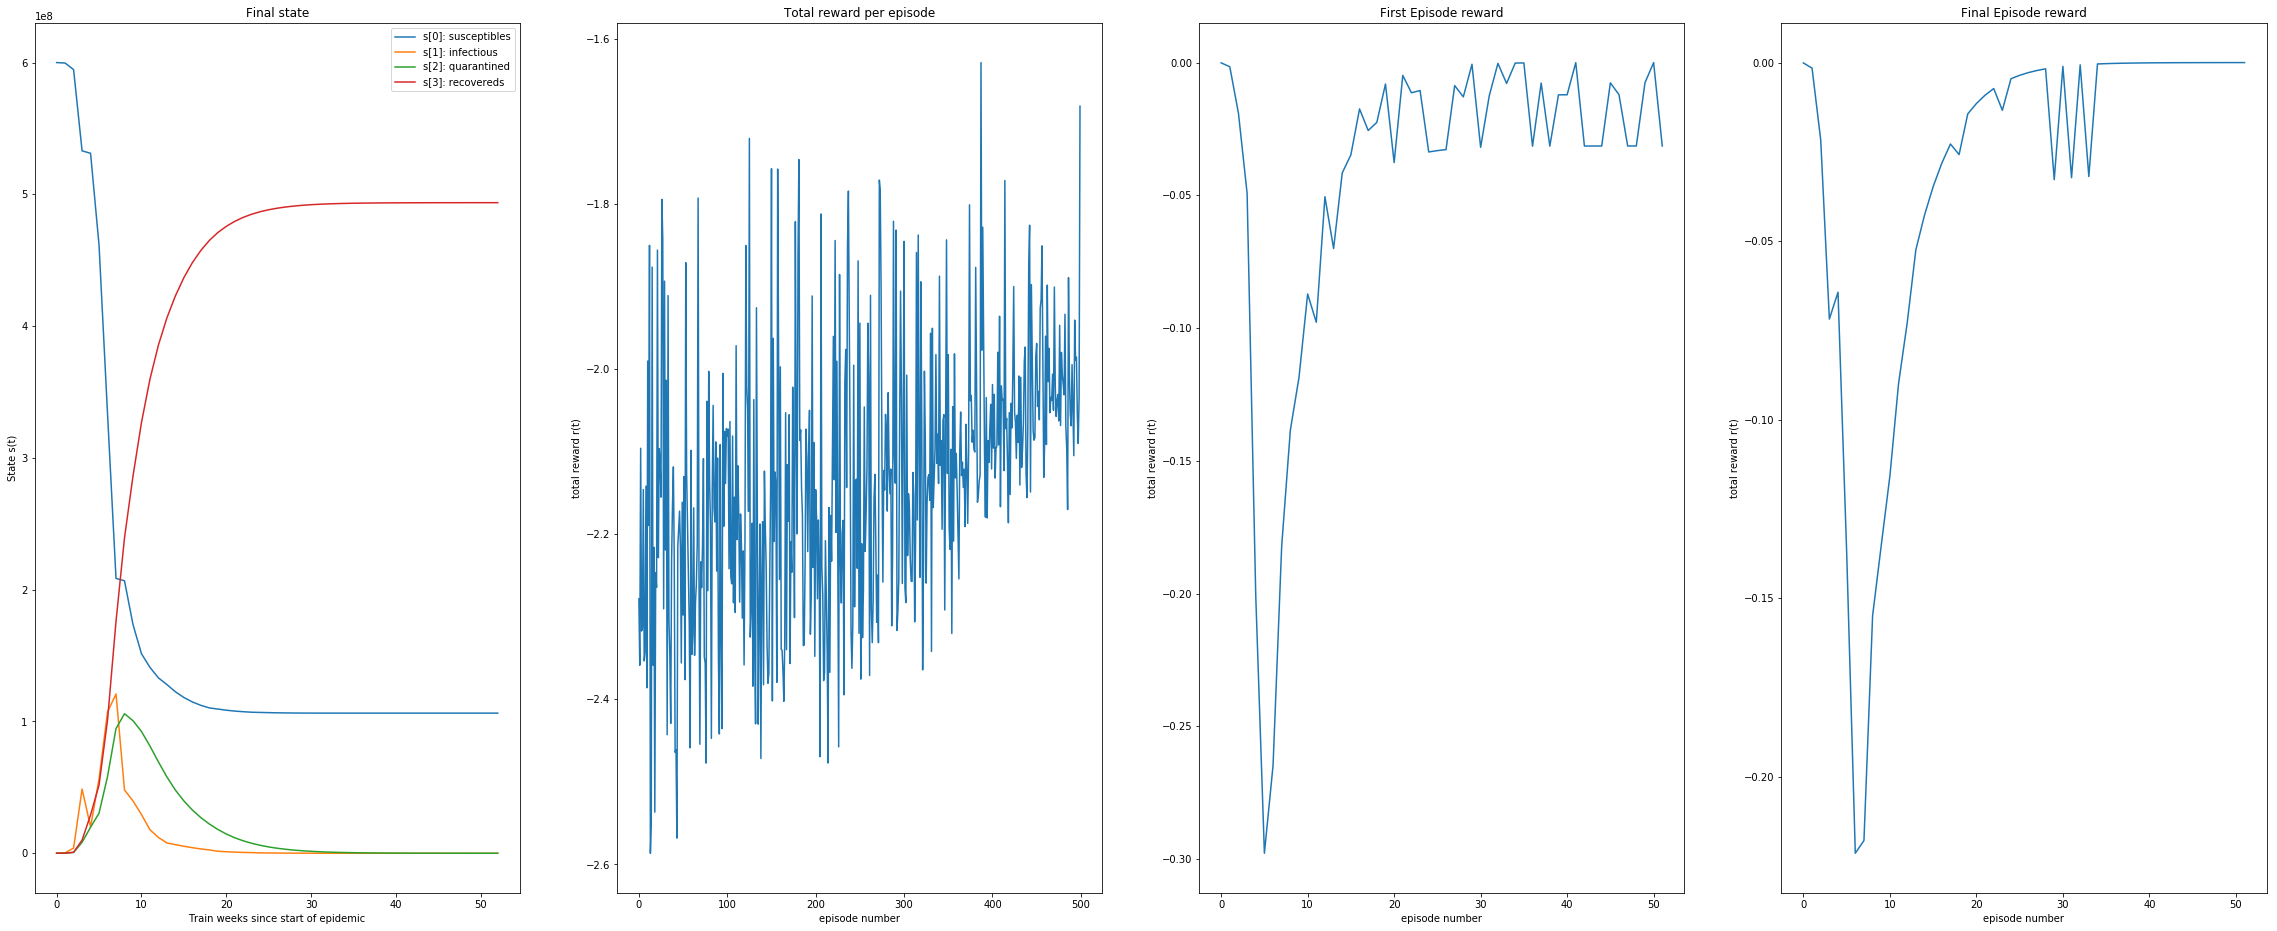

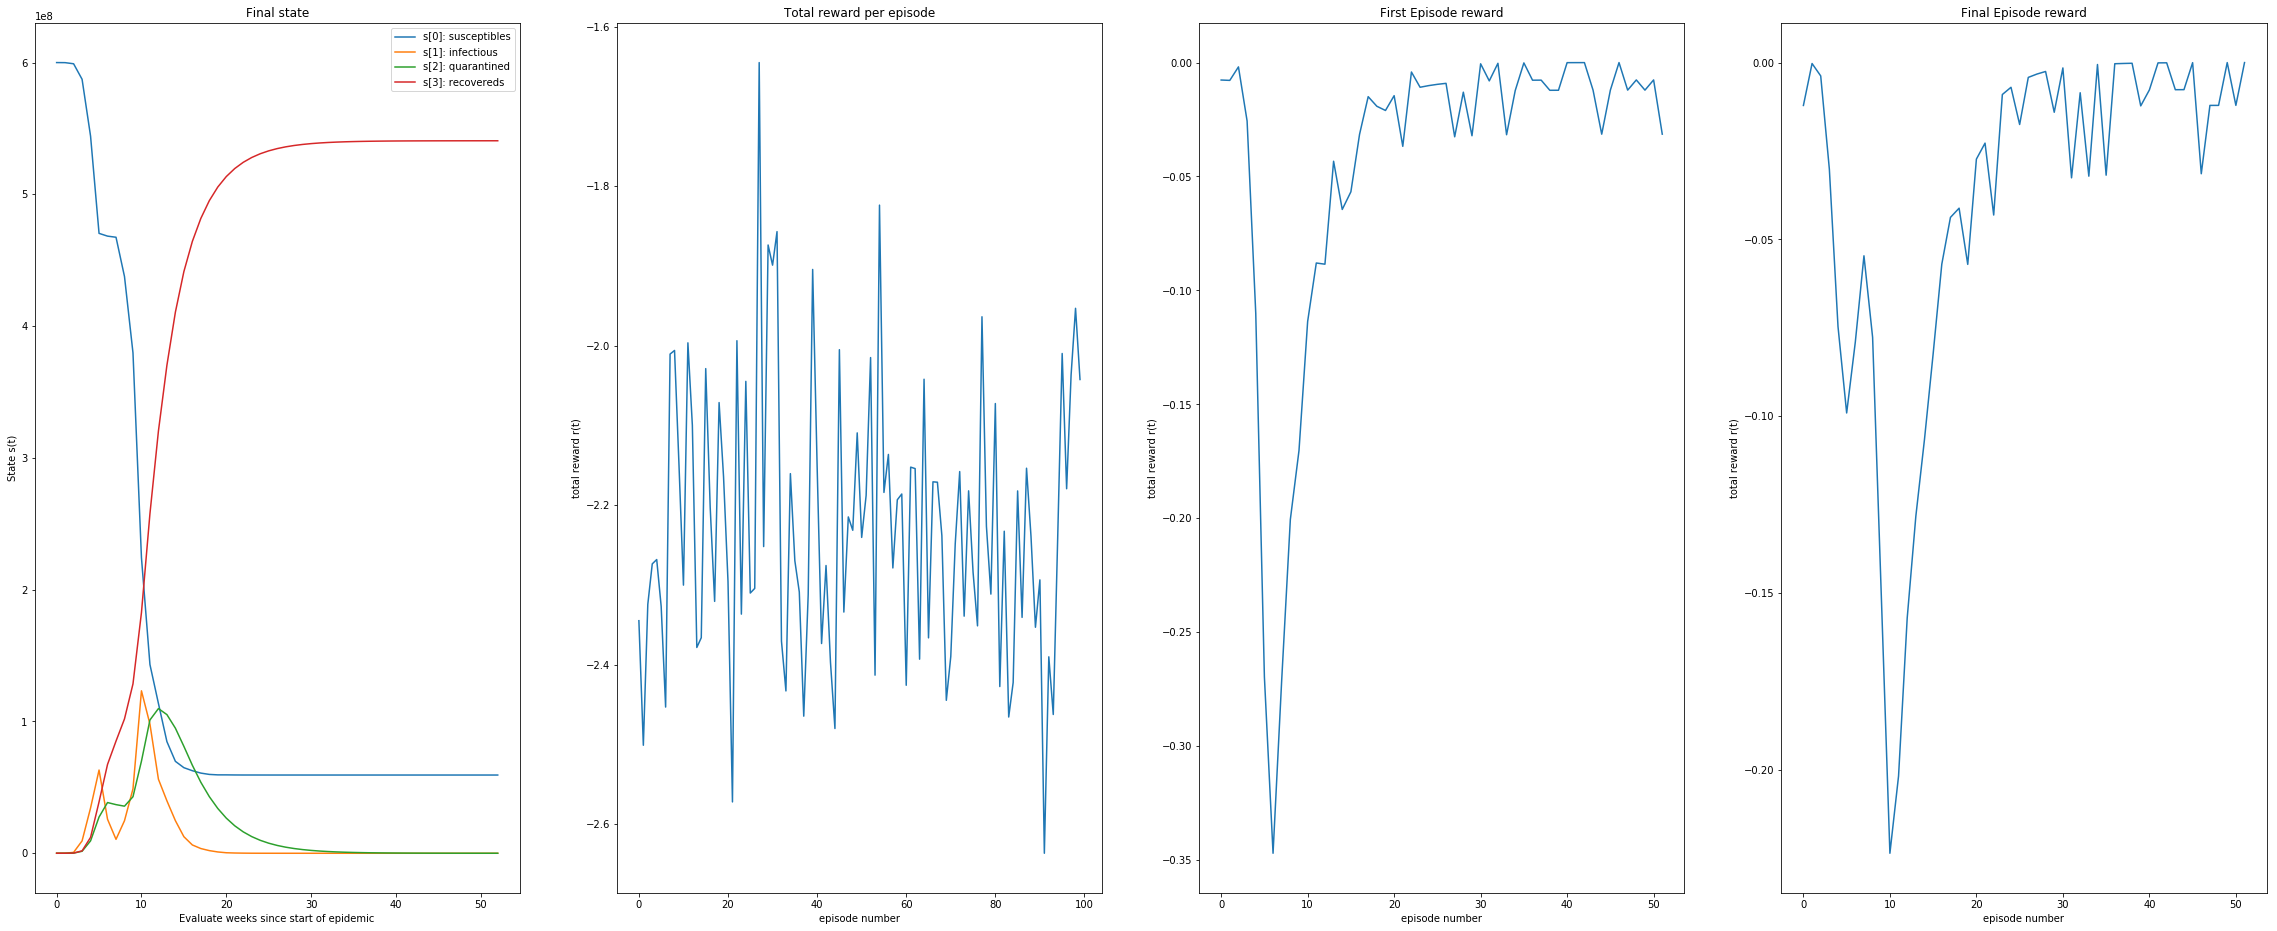

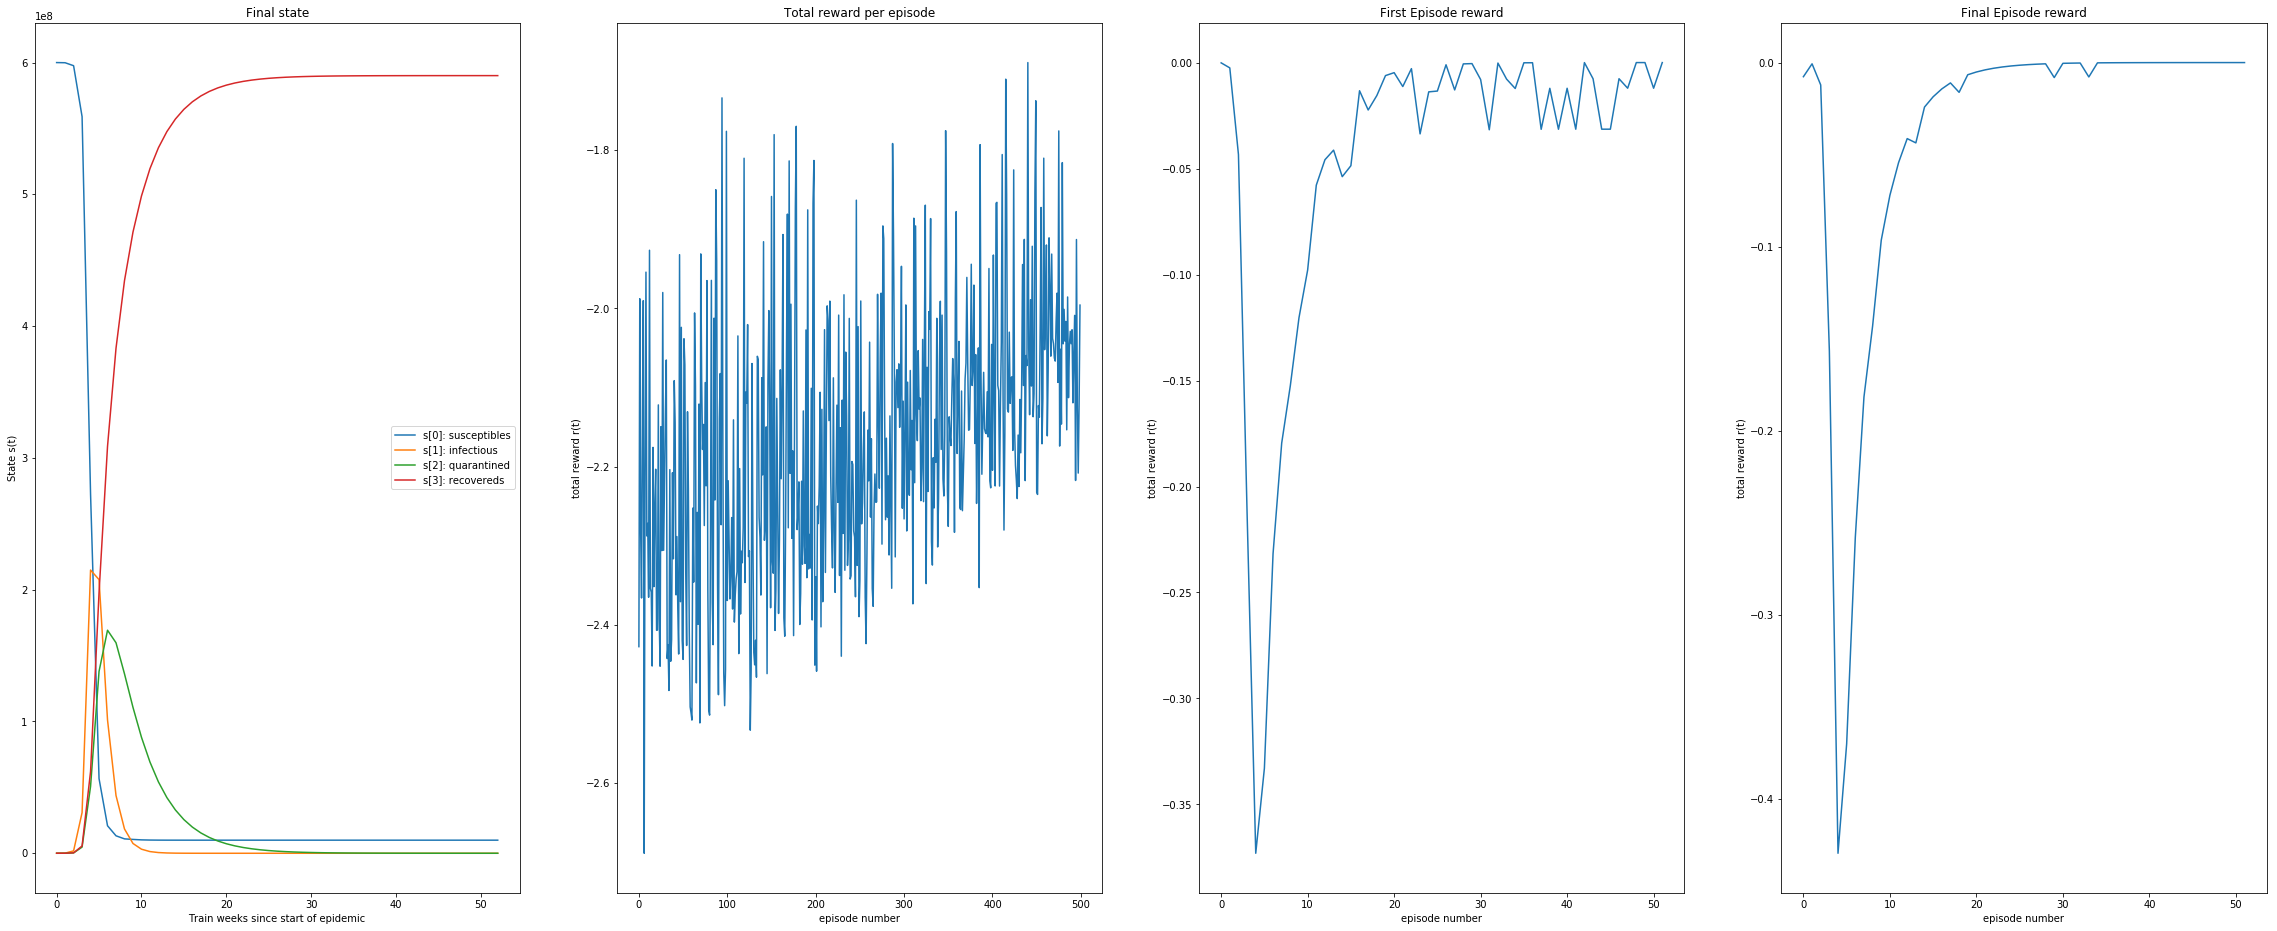

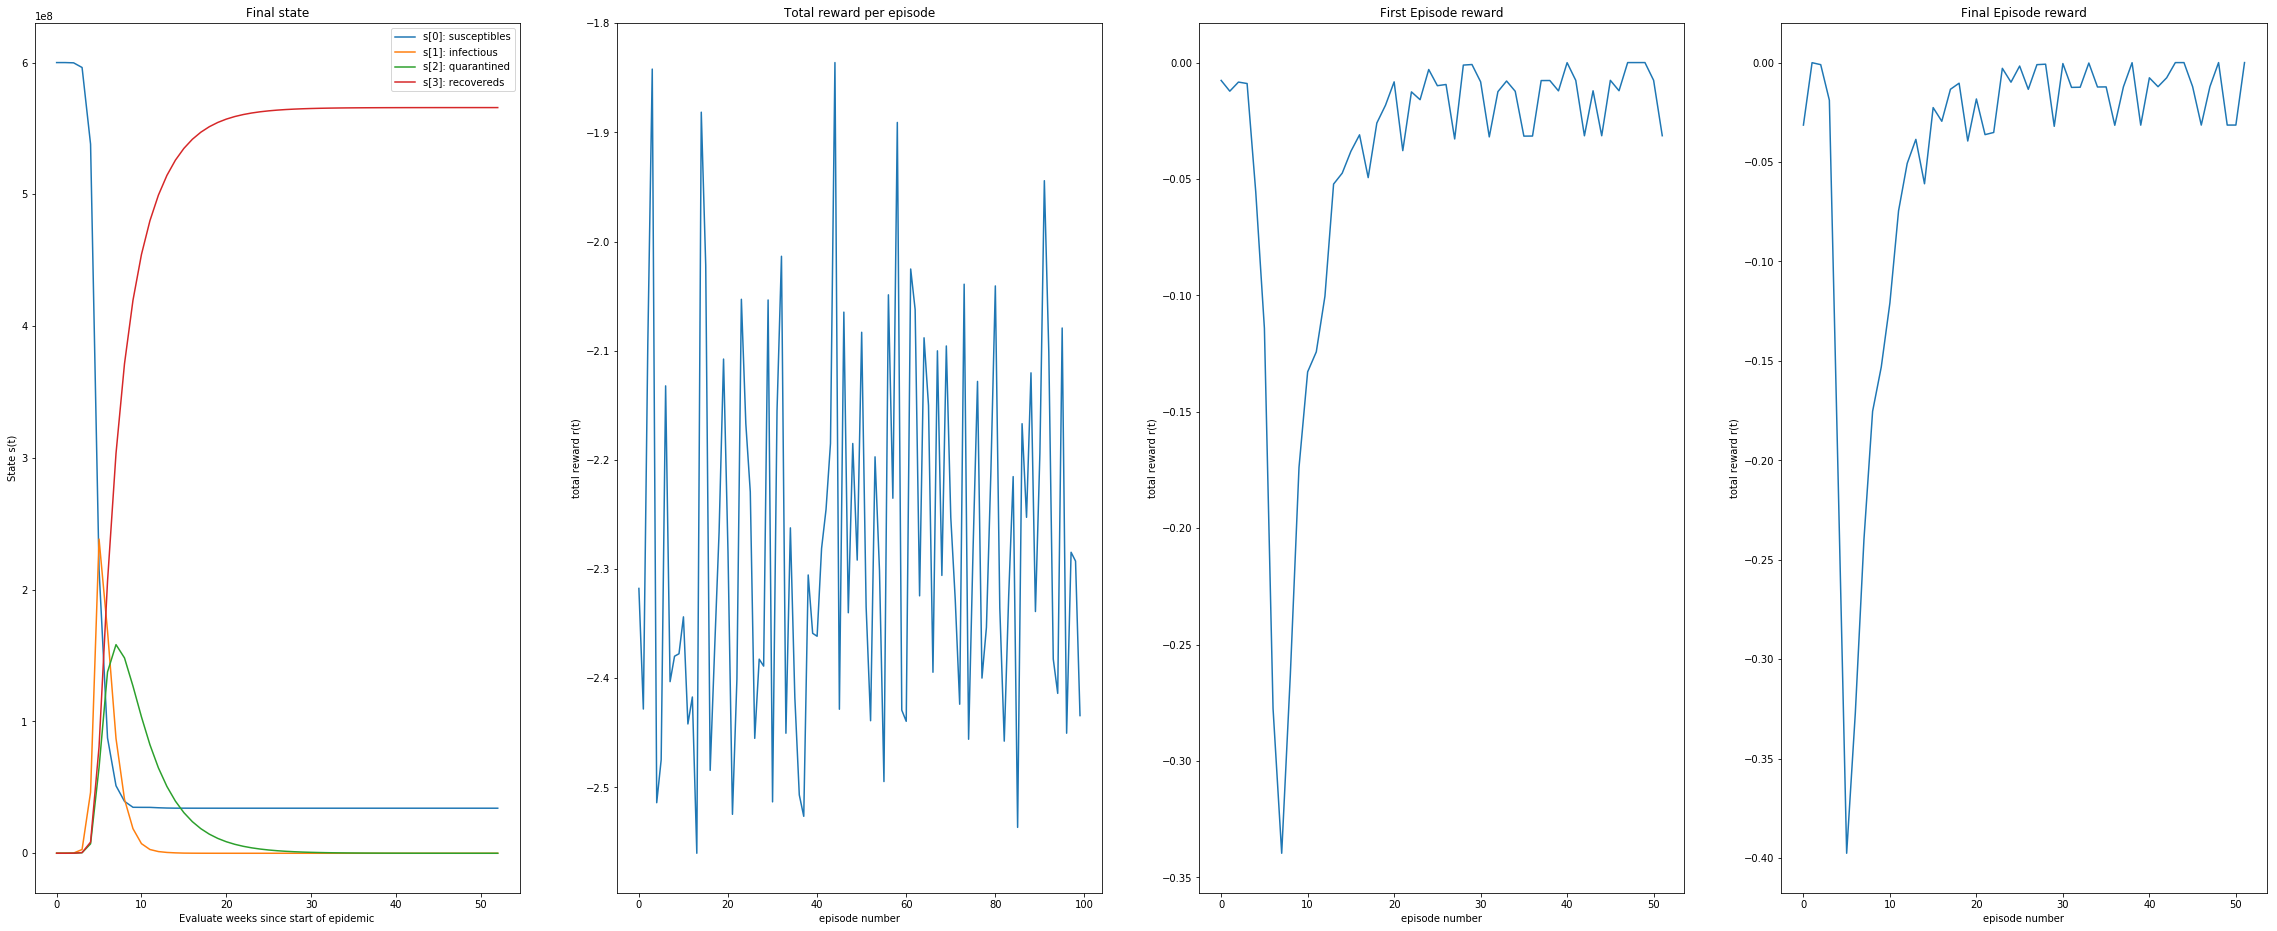

In [4]:
#change the problem id

for i in range(0,10):
    print("Problem id: " + str(i))
    print()
    env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
    agent = Tabular_Policy_Agent(env)
    
   
    states,all_rewards, all_total_rewards = agent.train()
    title = "Train: problem id " + str(i) + " "
    print(title)
    plot(states,agent, all_total_rewards, all_rewards,title)

    title = "Evaluate: problem id " + str(i) + " "
    print(title)
    states,all_rewards, all_total_rewards = agent.evaluate()
    plot(states,agent, all_total_rewards, all_rewards,title)


stochastic=False, noisy=False
Decrease Factor: 0.0016
Train
Evaluate
stochastic=True, noisy=False
Decrease Factor: 0.0016
Train
Evaluate
stochastic=False, noisy=True
Decrease Factor: 0.0016
Train
Evaluate
stochastic=True, noisy=True
Decrease Factor: 0.0016
Train
Evaluate


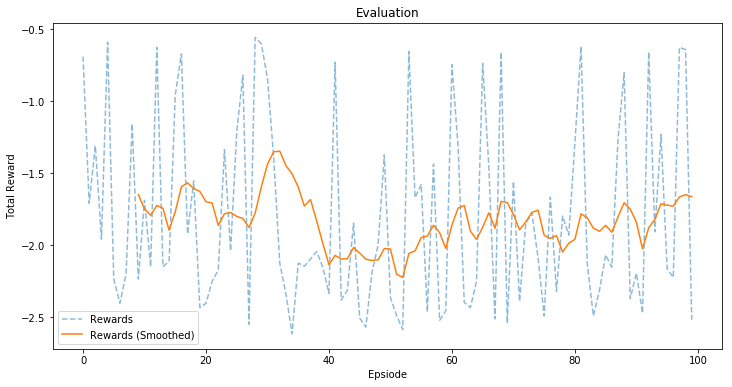

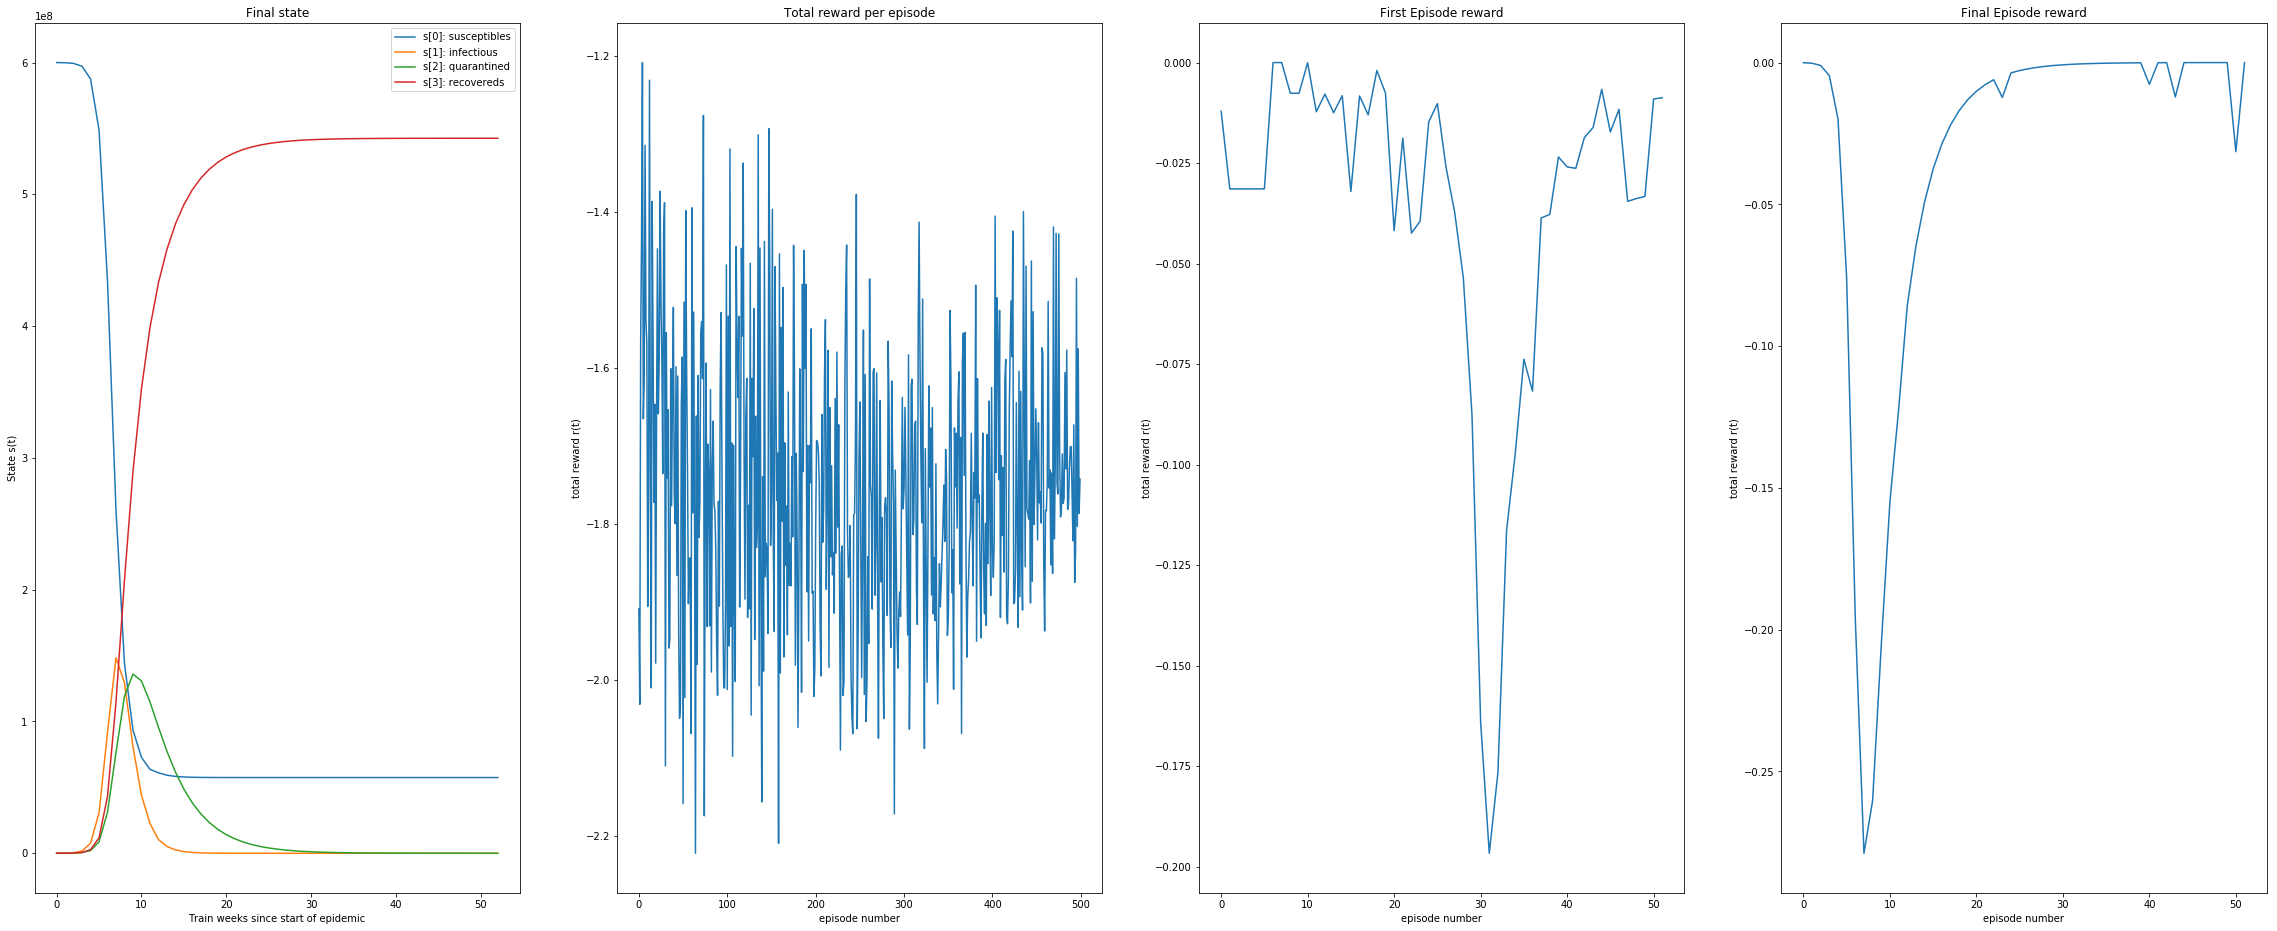

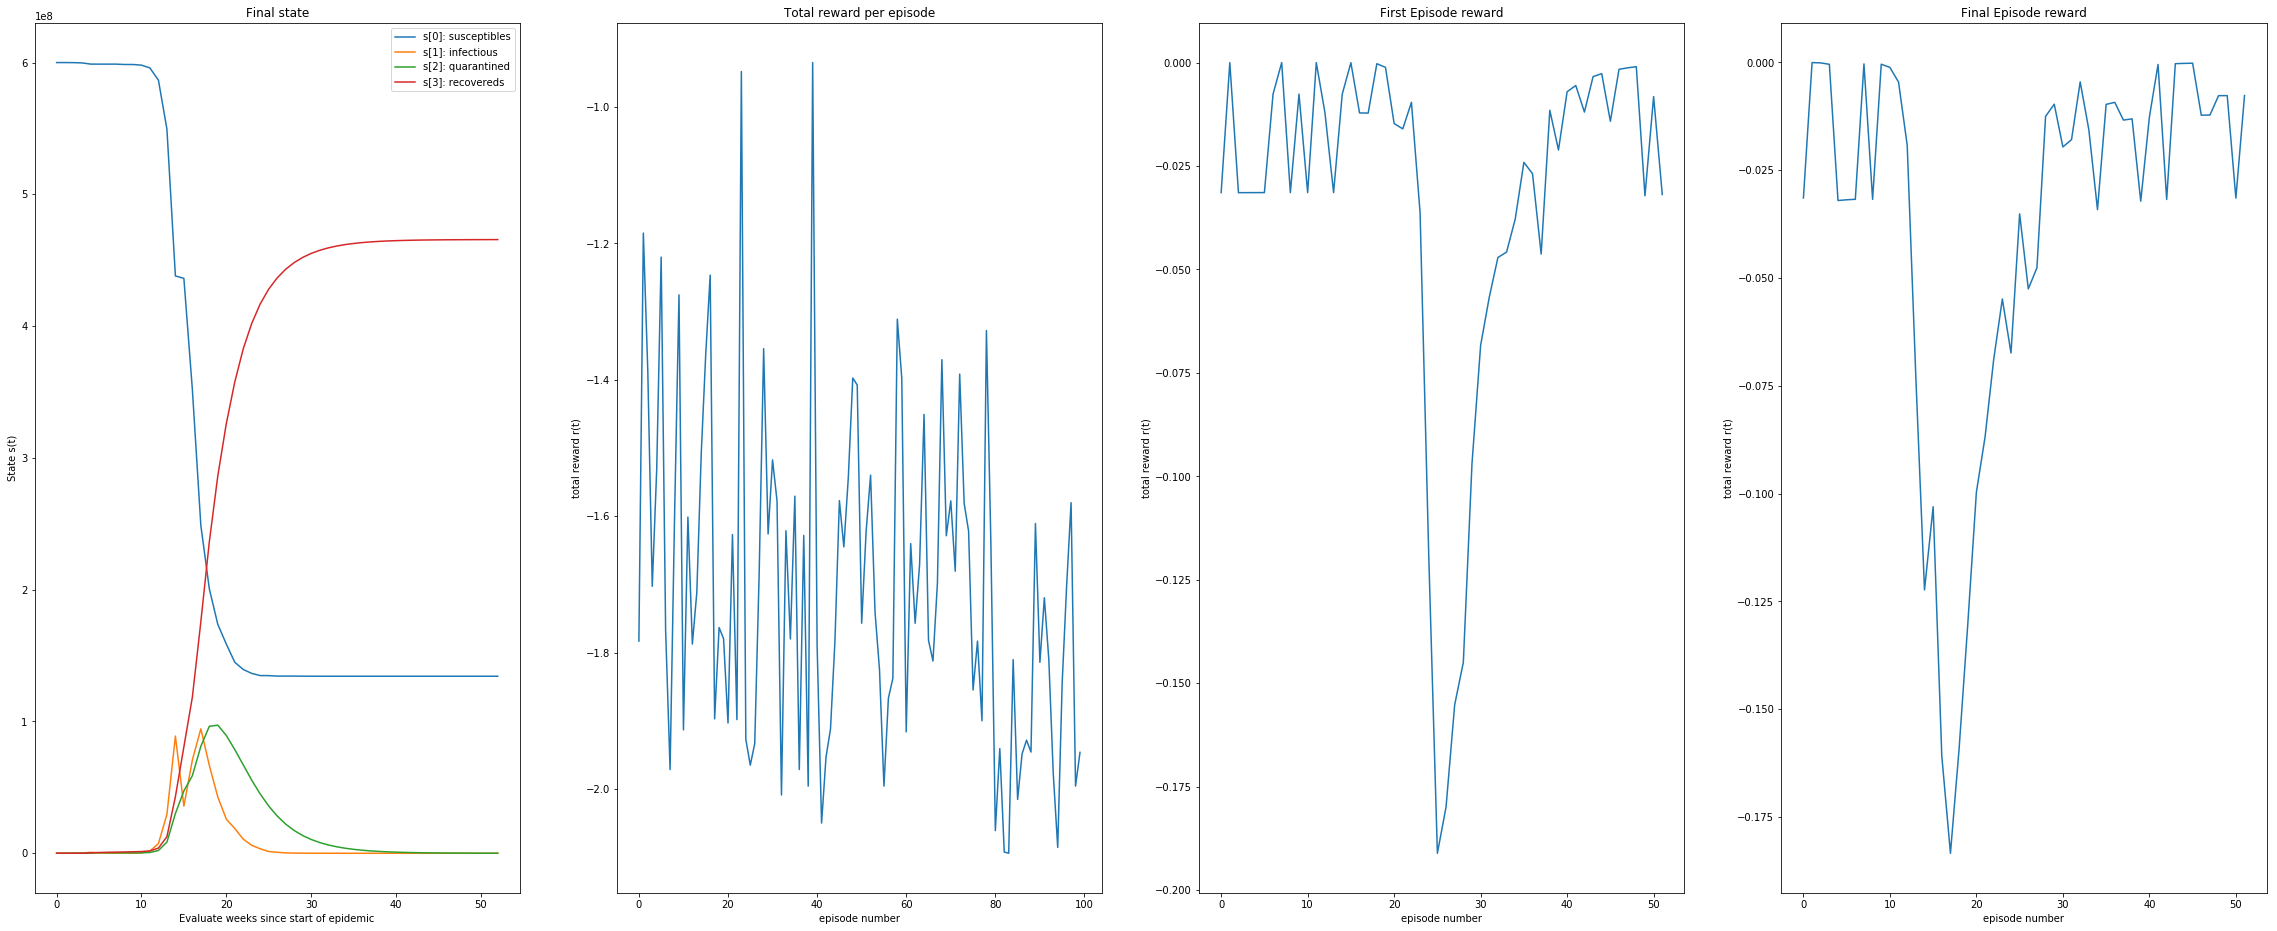

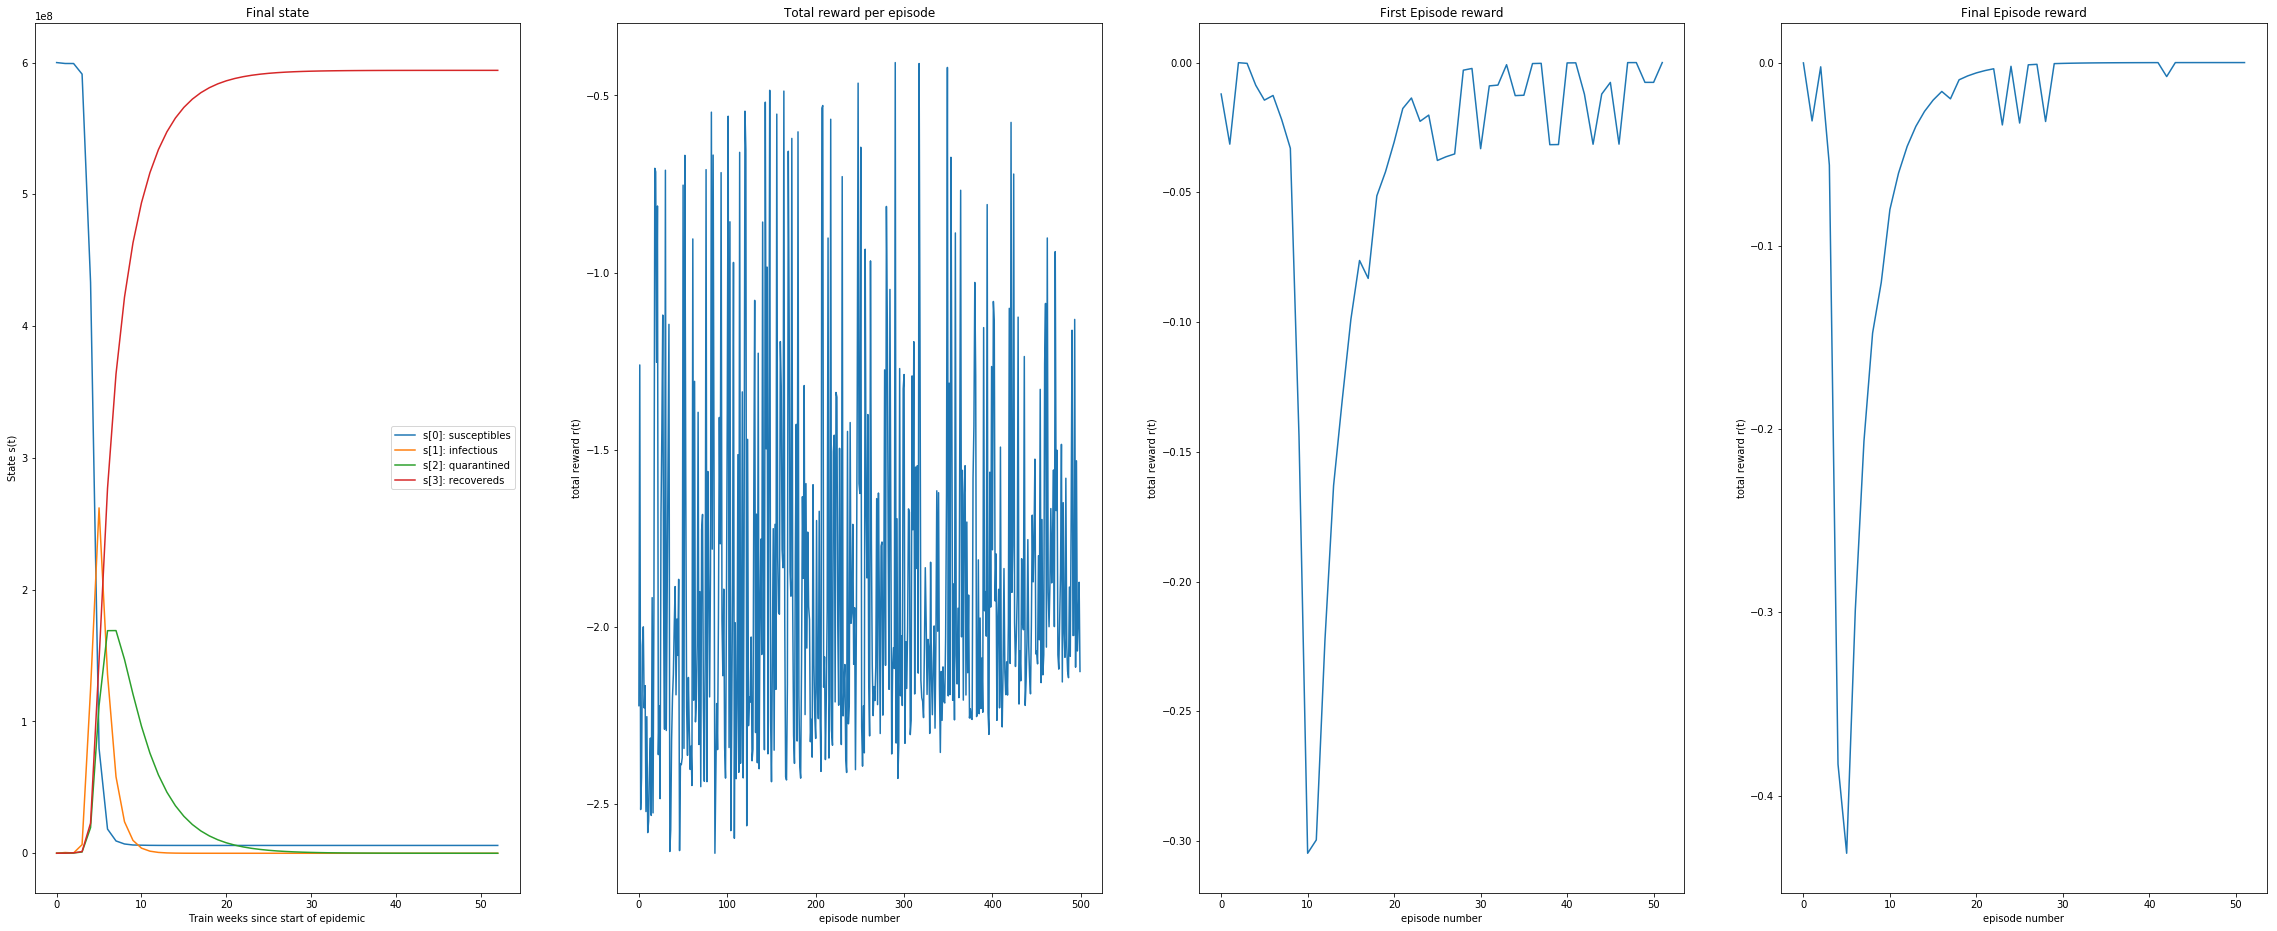

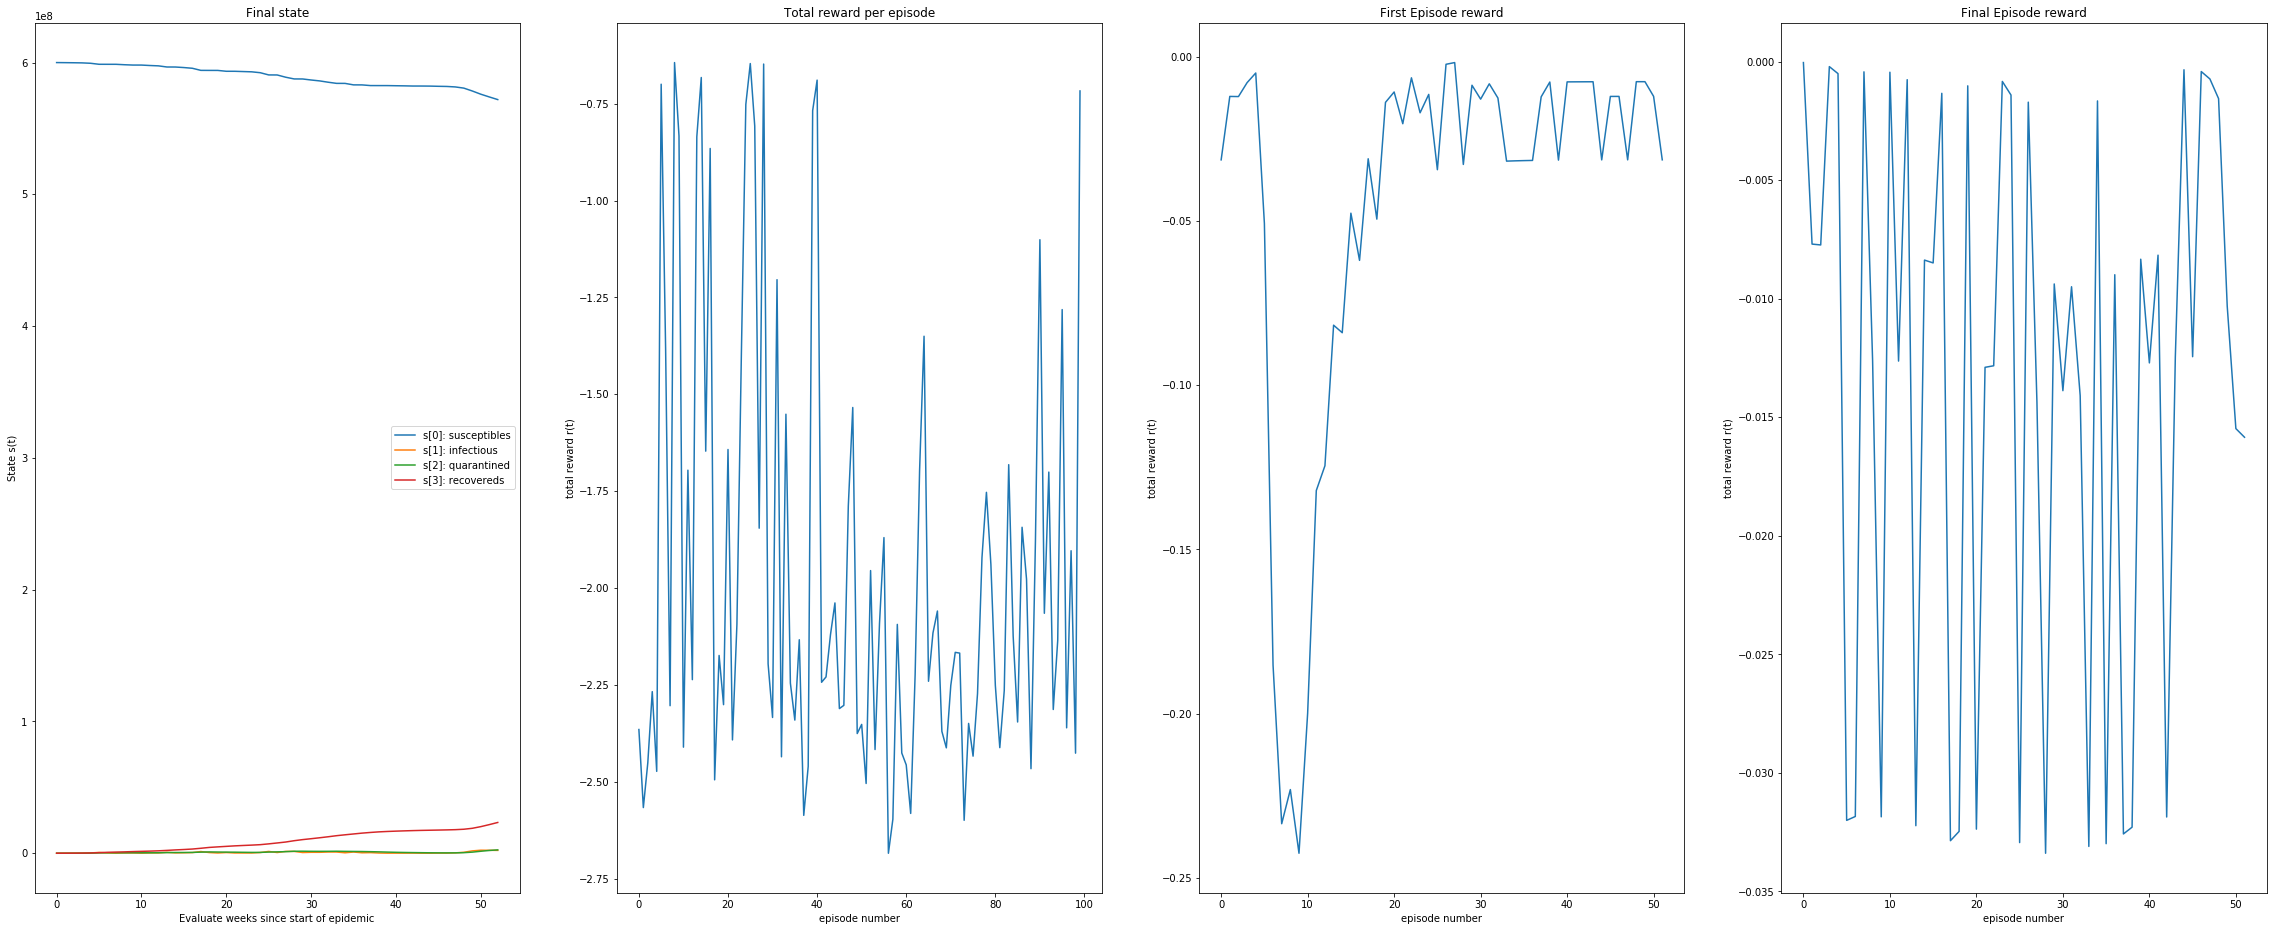

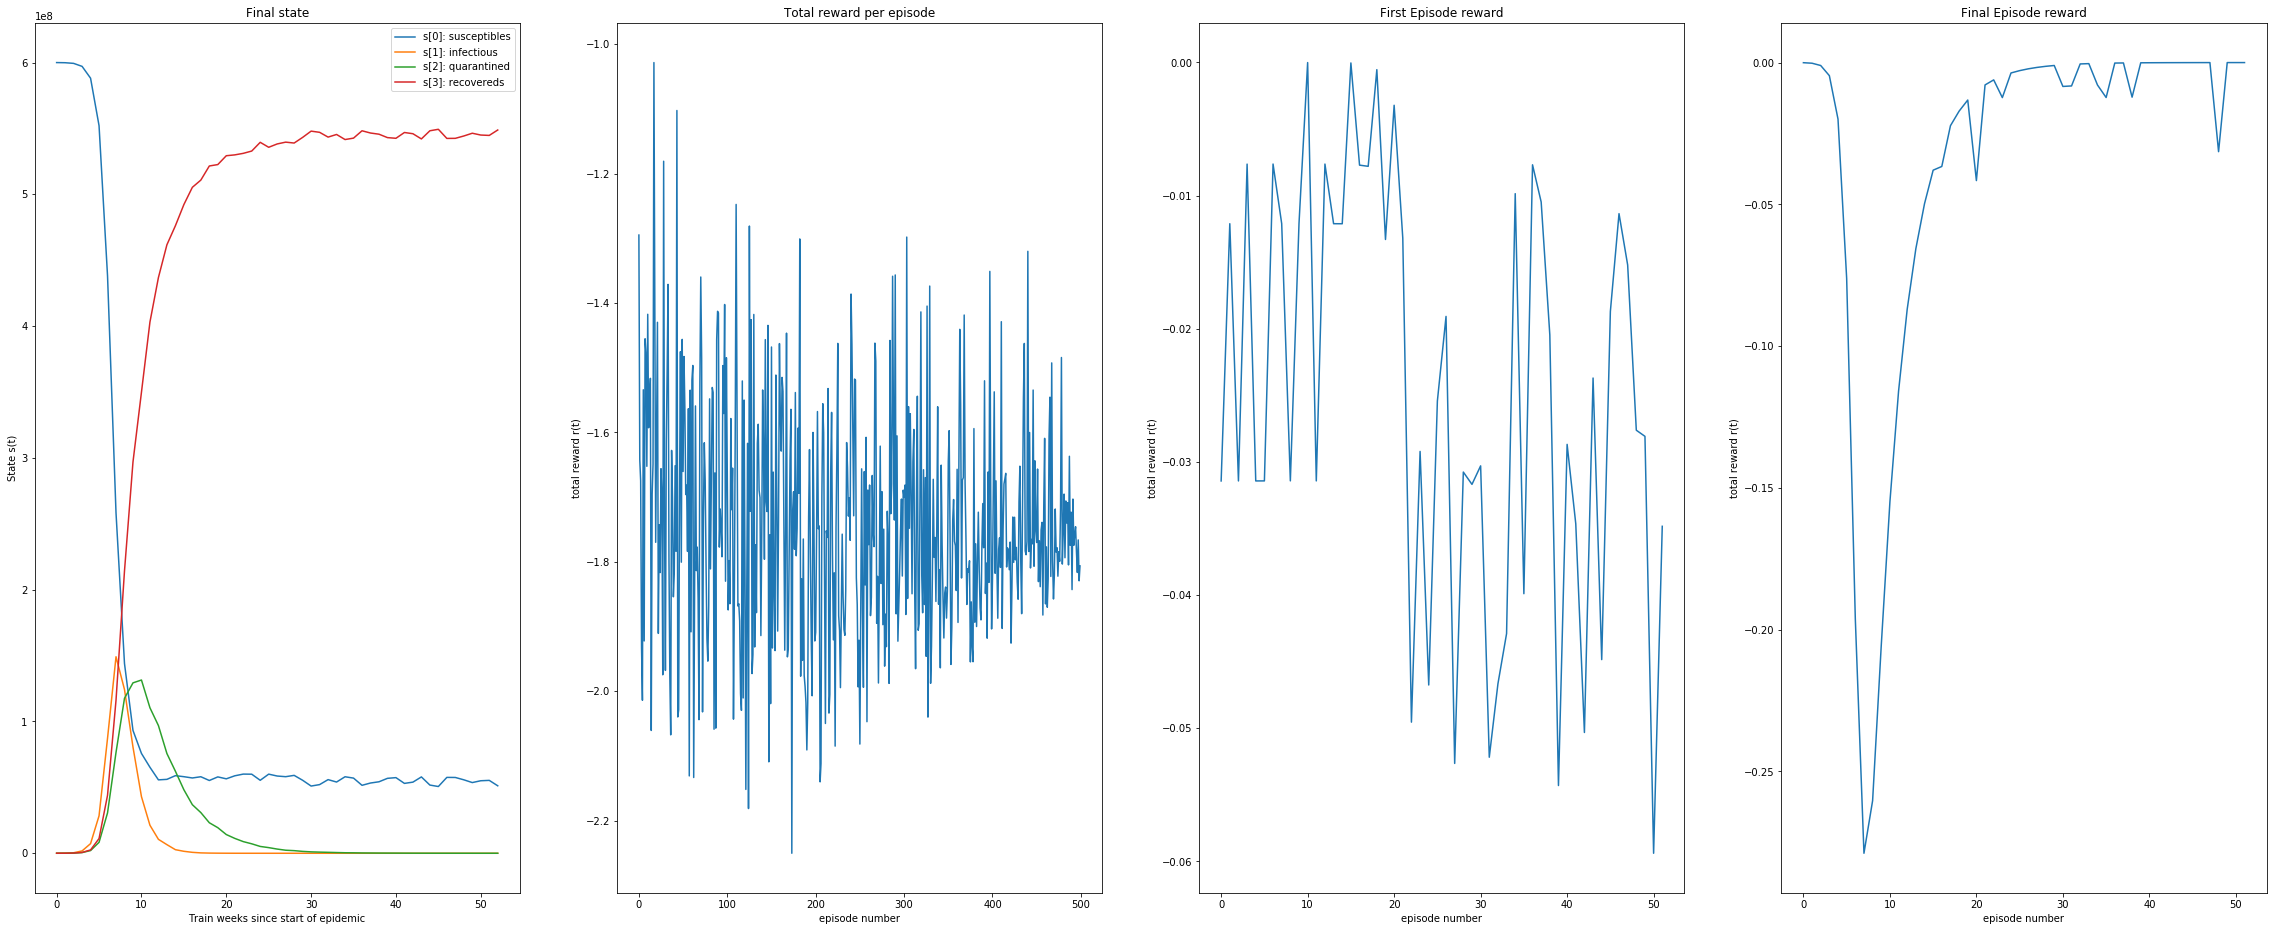

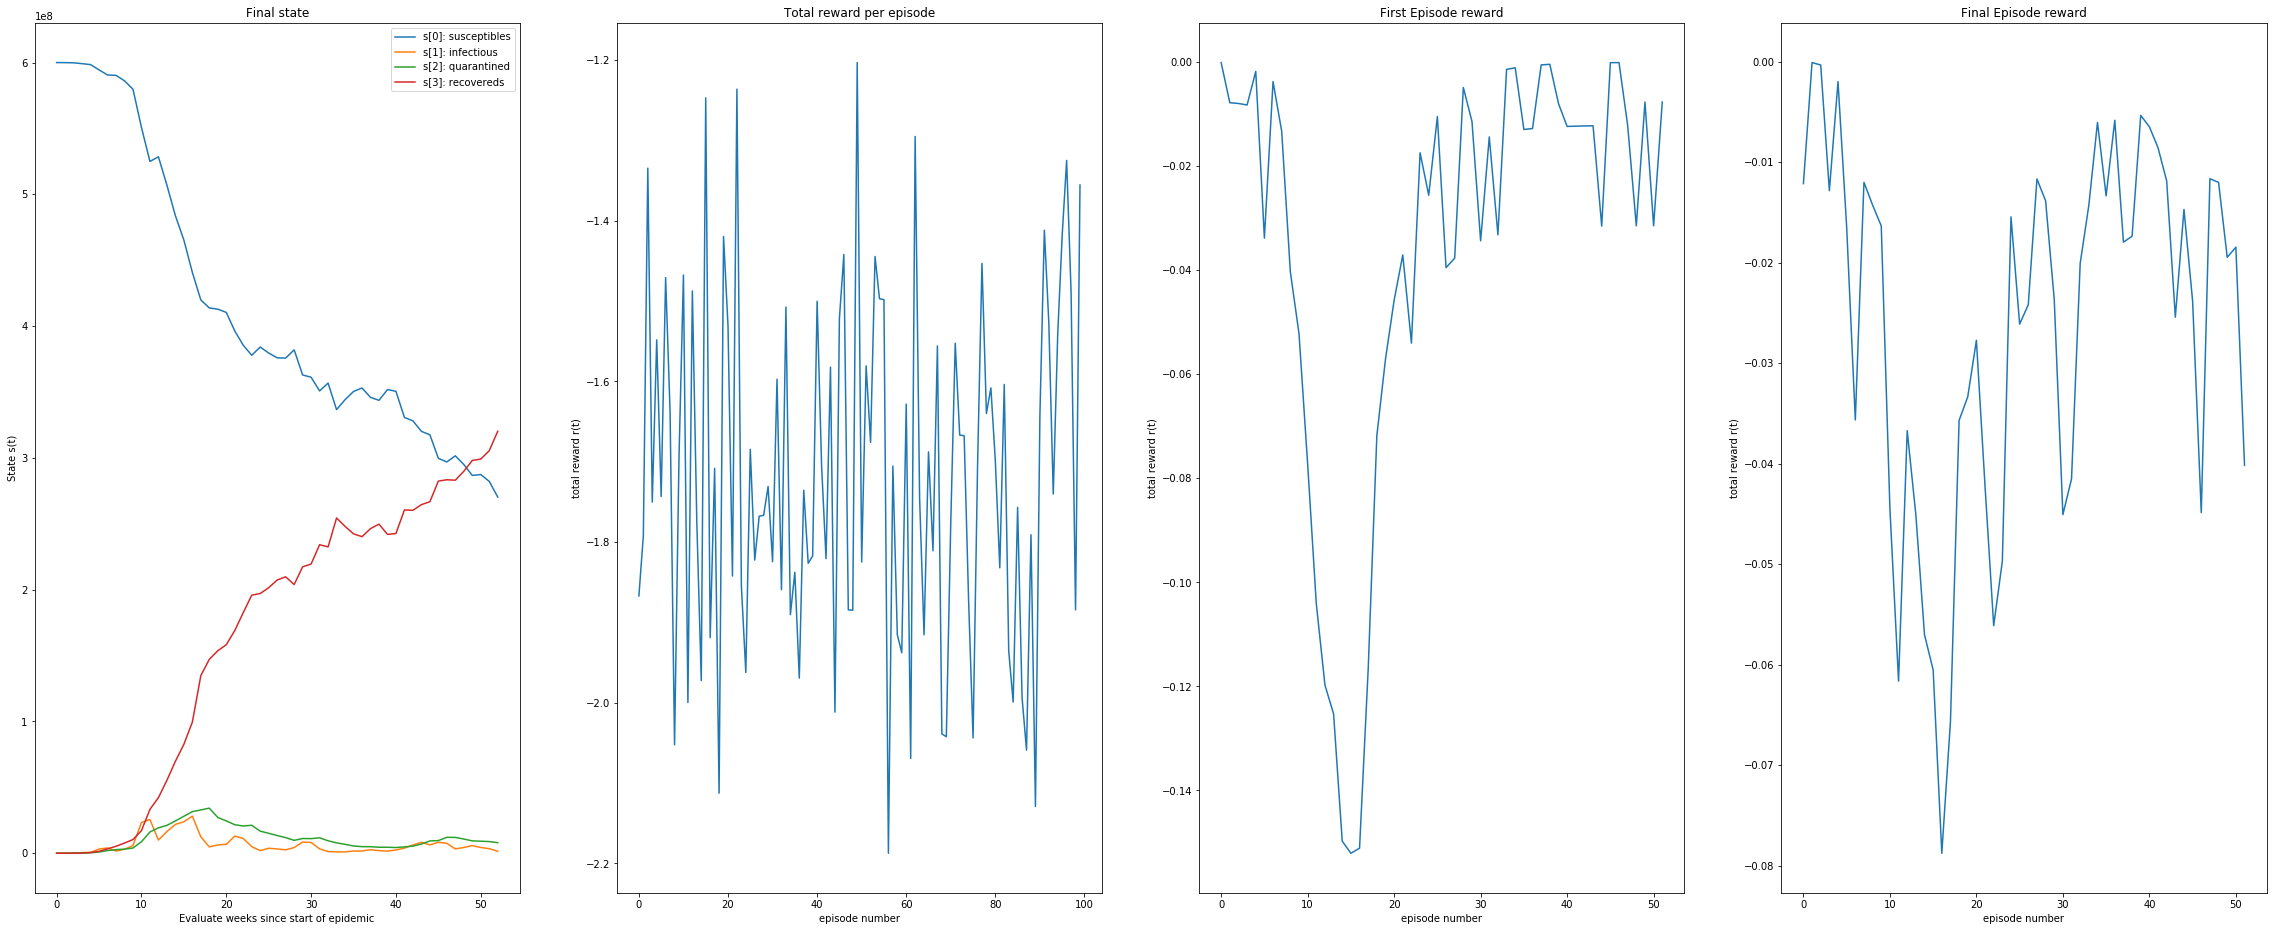

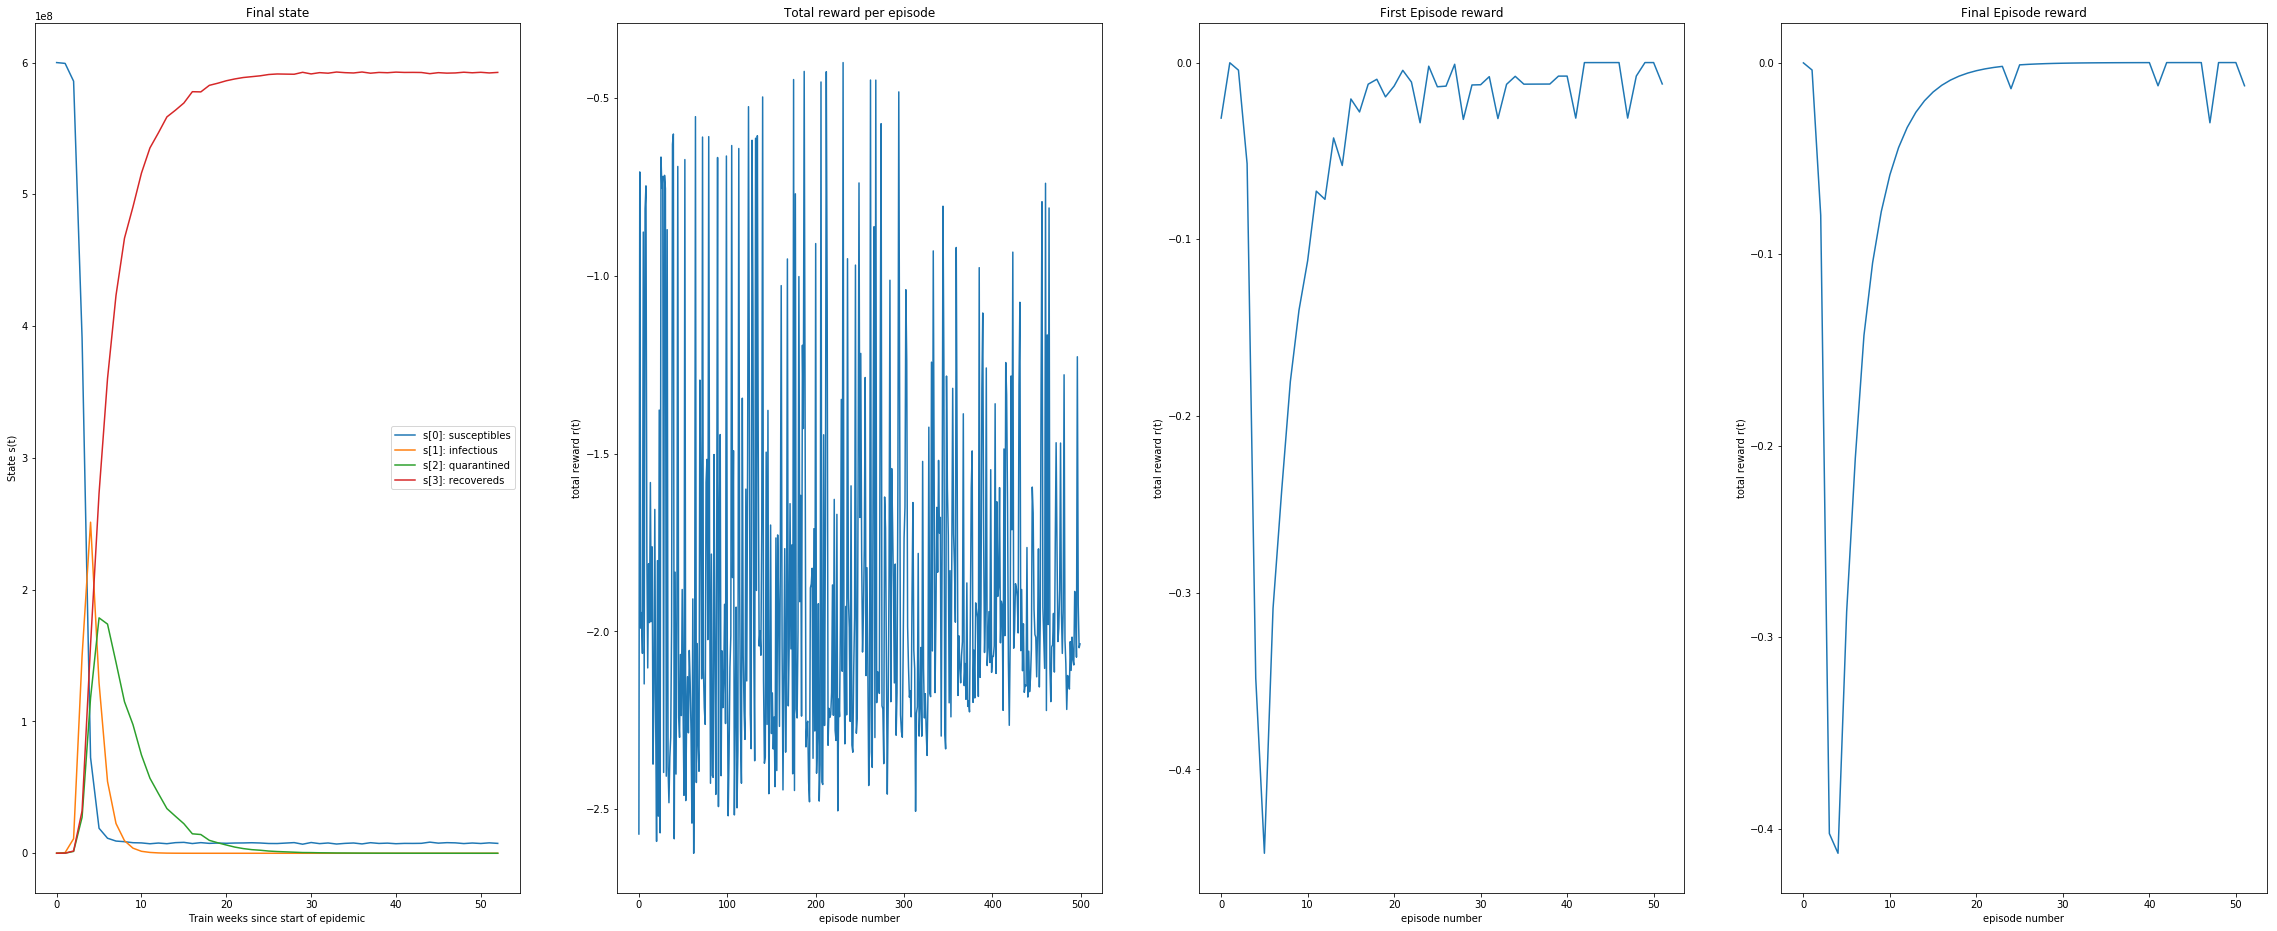

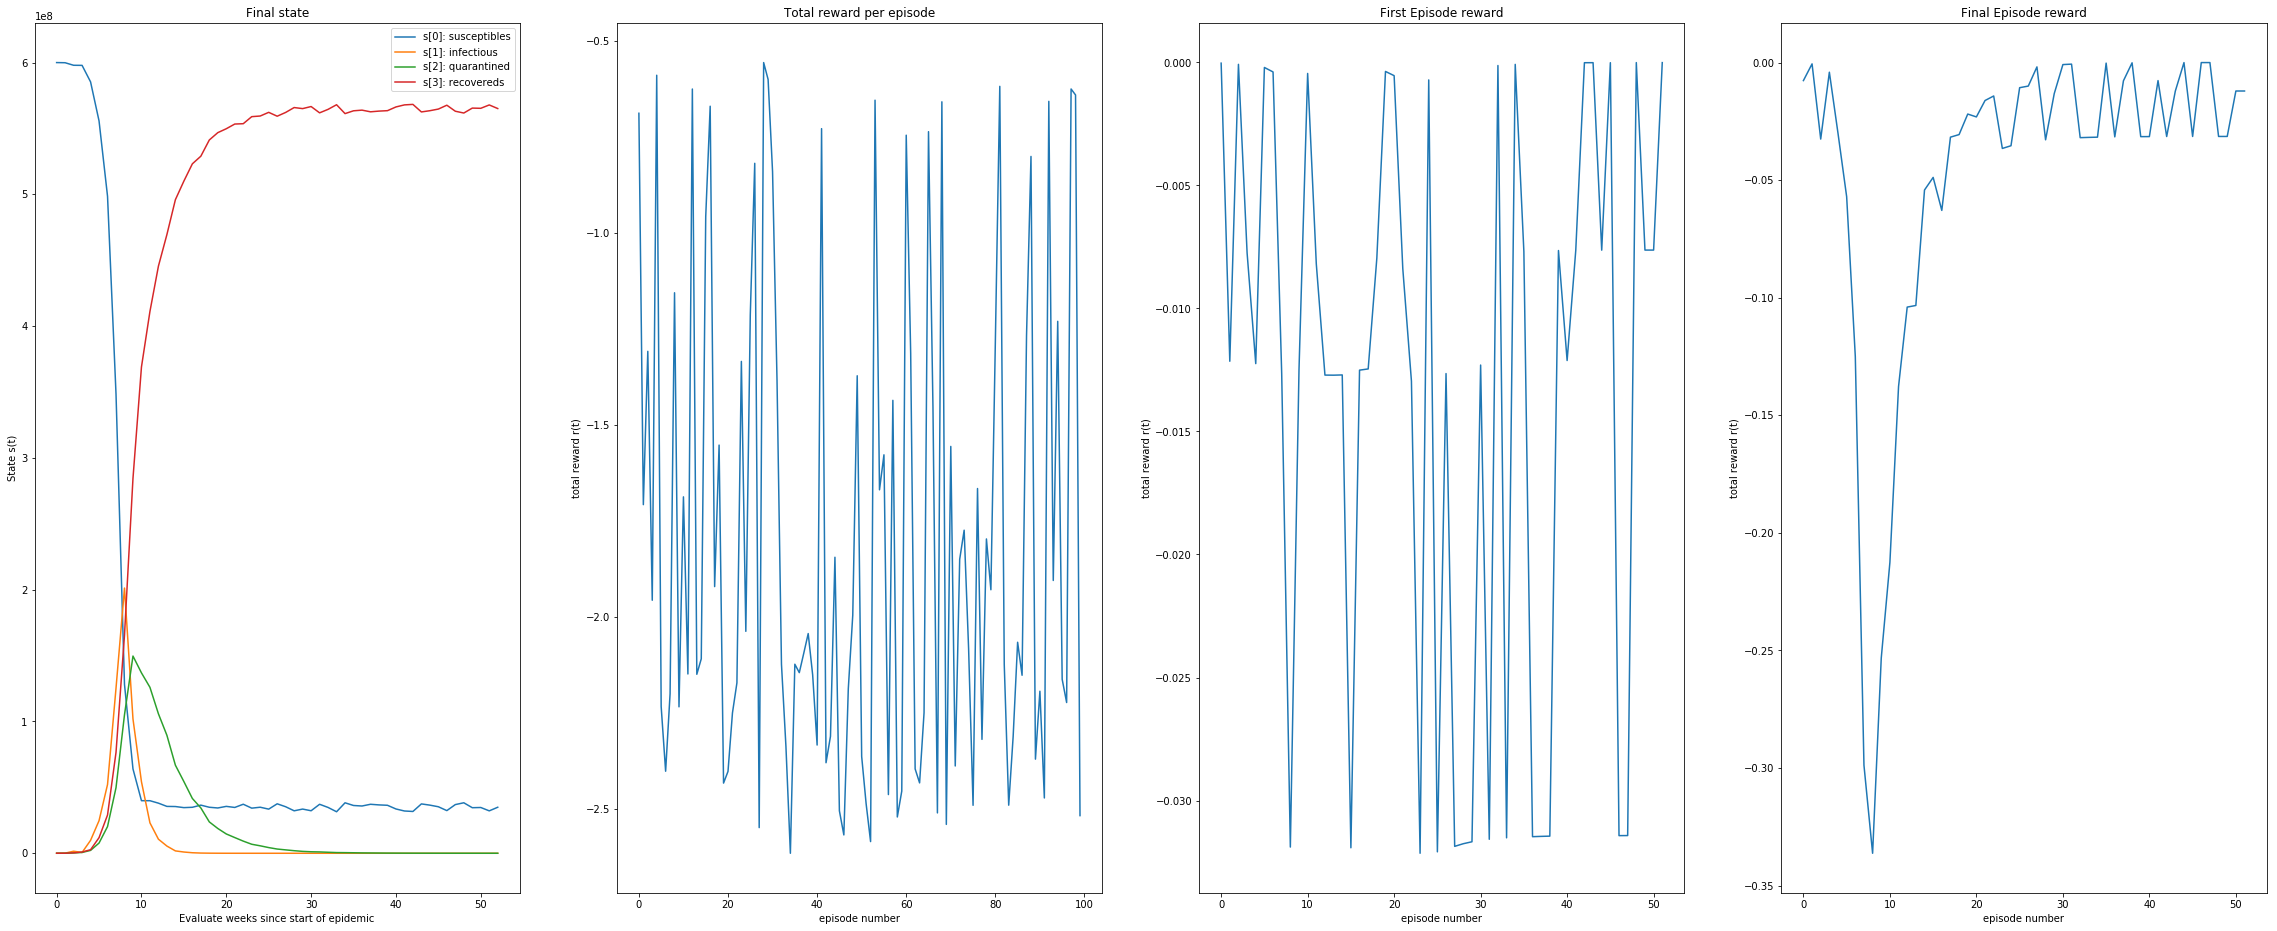

In [5]:
#chnage stochastic and noisy
stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}
for i in range(0,4):
    print(stochastic_noisy_print[i])
    env = stochastic_noisy[i] 
    agent = Tabular_Policy_Agent(env)
    
    
    title = "Train: " stochastic_noisy_print + " "
    print(title)
    states,all_rewards, all_total_rewards = agent.train()
    plot(states,agent, all_total_rewards, all_rewards,title)

    title = "Evaluate: " stochastic_noisy_print + " "
    print(title)
    states,all_rewards, all_total_rewards = agent.evaluate()
    plot(states,agent, all_total_rewards, all_rewards,title)


In [6]:
total_reward_sd = np.std(all_total_rewards)
total_reward_mean = np.mean(all_total_rewards)
reward_sd = np.std(all_rewards)
reward_mean = np.mean(all_rewards)

print("Total reward standard deviation = " + str(total_reward_sd))
print("Total reward mean = " + str(total_reward_mean))
print("Reward standard deviation = " + str(reward_sd))
print("Rotal reward mean = " + str(reward_mean))

Total reward standard deviation = 0.6483973180164626
Total reward mean = -1.7986548133242841
Reward standard deviation = 0.055868739890949044
Rotal reward mean = -0.03458951564085162
